# Computational Network Analysis 2016 - Pokémon Origins

### Project file by Nicolas Lehmann from 01/03/2016

In [1]:
# load needed libraries
library(Hmisc)      # describtive statistics
library(dplyr)      # xtra functions
library(igraph)     # iGraph
library(networkD3)  # xtra graphs

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units


Attaching package: 'dplyr'

The following objects are masked from 'package:Hmisc':

    combine, src, summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'igraph'

The following objects are masked from 'package:dplyr':

    %>%, as_data_frame, groups, union

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



## Data collection

The data for this project have been collected by watching the series "Pokémon Origins" (four episodes) while making notes of the interrelations between Persons and Persons, Persons and Pokémons and Pokémons and Pokémons.

Below a link list to the video material on youtube.com is listed:
- Episode 1: https://www.youtube.com/watch?v=dEJhfW5qhJM
- Episode 2: https://www.youtube.com/watch?v=KW5MZvGE0zc
- Episode 3, part 1: https://www.youtube.com/watch?v=6PNVqXOoqTU
- Episode 3, part 2: https://www.youtube.com/watch?v=IGpaqlA5wH0
- Episode 4, part 1: https://www.youtube.com/watch?v=h29tqKx00H0
- Episode 4, part 2: https://www.youtube.com/watch?v=gvMxVv2PLDc


### Persons in "Pokémon Origins"

In total 22 persons appear in all episodes.

In total 19 person fights happen during the whole TV-Show.

Person fights in each episode:
- Episode 1: 3 fights
- Episode 2: 5 fights
- Episode 3: 5 fights
- Episode 4: 6 fights

### Pokémon in "Pokémon Origins"

In total 76 Pokémon appear in all episodes.

XX of 76 Pokémons are involved in fights (XX%).

In total 41 Pokémon fights happen during the whole TV-Show.

Pokémon fights in each episode:
- Episode 1: 15 fights
- Episode 2: 1 fight
- Episode 3: 8 fights
- Episode 4: 17 fights


In [2]:
# load data into data frames
df_pers      <- read.csv("./data/POperson.csv",          encoding = "UTF8", sep = ";")
df_poke      <- read.csv("./data/POpokemon.csv",         encoding = "UTF8", sep = ";")
df_pers2pers <- read.csv("./data/POperson-person.csv",   encoding = "UTF8", sep = ";")
df_poke2poke <- read.csv("./data/POpokemon-pokemon.csv", encoding = "UTF8", sep = ";")

## Some descriptive statistics with the data...

In [3]:
describe(df_pers)

df_pers 

 2  Variables      22  Observations
--------------------------------------------------------------------------------
ID 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
     22       0      22       1    11.5    2.05    3.10    6.25   11.50   16.75 
    .90     .95 
  19.90   20.95 

lowest :  1  2  3  4  5, highest: 18 19 20 21 22 
--------------------------------------------------------------------------------
Name 
      n missing  unique 
     22       0      22 

lowest : Agathe      Blue        Bruno       Erika       Gentleman  
highest: Sabrina     Siegfried   Swot        Team Rocket Teenager    
--------------------------------------------------------------------------------

In [4]:
describe(df_poke)

df_poke 

 12  Variables      76  Observations
--------------------------------------------------------------------------------
ID 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
     76       0      76       1    38.5    4.75    8.50   19.75   38.50   57.25 
    .90     .95 
  68.50   72.25 

lowest :  1  2  3  4  5, highest: 72 73 74 75 76 
--------------------------------------------------------------------------------
PokemonDE 
      n missing  unique 
     76       0      76 

lowest : Alpollo   Arbok     Arkani    Arktos    Bisasam  
highest: Turtok    Voltoball Vulpix    Zapdos    Zubat     
--------------------------------------------------------------------------------
PokemonEN 
      n missing  unique 
     76       0      76 

lowest : Alakazam   Arbok      Arcanine   Articuno   Blastoise 
highest: Weedle     Weezing    Wigglytuff Zapdos     Zubat      
--------------------------------------------------------------------------------
Type1 

In [5]:
describe(df_pers2pers)

df_pers2pers 

 7  Variables      16  Observations
--------------------------------------------------------------------------------
PID1 
      n missing  unique    Info    Mean 
     16       0       2    0.33   2.125 

2 (14, 88%), 3 (2, 12%) 
--------------------------------------------------------------------------------
PID2 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
     16       0      15       1    13.5    2.75    3.50   10.25   15.00   18.25 
    .90     .95 
  20.50   21.25 

          2 3 4 5 12 13 14 15 16 17 18 19 20 21 22
Frequency 1 1 1 1  1  1  1  2  1  1  1  1  1  1  1
%         6 6 6 6  6  6  6 12  6  6  6  6  6  6  6
--------------------------------------------------------------------------------
Folge1 
      n missing  unique    Info     Sum    Mean 
     16       0       2    0.46       3  0.1875 
--------------------------------------------------------------------------------
Folge2 
      n missing  unique    Info    Mean 


In [6]:
describe(df_poke2poke)

df_poke2poke 

 7  Variables      41  Observations
--------------------------------------------------------------------------------
PokeID1 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
     41       0      20    0.99    32.9       4       4       8      32      50 
    .90     .95 
     71      73 

lowest :  2  3  4  5  8, highest: 61 71 73 74 75 
--------------------------------------------------------------------------------
PokeID2 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
     41       0      31       1    32.8       3       4      10      30      56 
    .90     .95 
     67      69 

lowest :  2  3  4  7  8, highest: 65 67 69 70 71 
--------------------------------------------------------------------------------
Folge1 
      n missing  unique    Info     Sum    Mean 
     41       0       2     0.7      15  0.3659 
--------------------------------------------------------------------------------
Folge2 

In [7]:
# create clean person-person data frame
y <- merge.data.frame(df_pers,df_pers2pers, by.x = "ID", by.y = "PID2", all=FALSE)
d_pers2pers <- merge.data.frame(df_pers,y,by.x = "ID", by.y = "PID1", all=FALSE)
d_pers2pers <- d_pers2pers[,!(names(d_pers2pers) == "ID")]       # remove columns
names(d_pers2pers)[names(d_pers2pers)=="Name.x"] <- "Winner"     # rename column
names(d_pers2pers)[names(d_pers2pers)=="Name.y"] <- "Looser"     # rename column
names(d_pers2pers)[names(d_pers2pers)=="Folge1"] <- "Episode1"   # rename column
names(d_pers2pers)[names(d_pers2pers)=="Folge2"] <- "Episode2"   # rename column
names(d_pers2pers)[names(d_pers2pers)=="Folge3"] <- "Episode3"   # rename column
names(d_pers2pers)[names(d_pers2pers)=="Folge4"] <- "Episode4"   # rename column
names(d_pers2pers)[names(d_pers2pers)=="Gesamt"] <- "Total"      # rename column

Warning message:
In merge.data.frame(df_pers, y, by.x = "ID", by.y = "PID1", all = FALSE): column name 'ID' is duplicated in the result

In [8]:
# create clean Pokémon-Pokémon data frame
y <- merge.data.frame(df_poke, df_poke2poke, by.x = "ID", by.y = "PokeID2", all=FALSE)
d_poke2poke <- merge.data.frame(df_poke, y, by.x = "ID", by.y = "PokeID1", all=FALSE)
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "ID")]                 # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "PokemonDE.x")]        # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Type1.x")]            # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Type2.x")]            # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Total.x")]            # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "HP.x")]               # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Attack.x")]           # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Defense.x")]          # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Speed.Attack.x")]     # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Speed.Defense.x")]    # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Speed.x")]            # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "PokemonDE.y")]        # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Type1.y")]            # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Type2.y")]            # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Total.y")]            # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "HP.y")]               # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Attack.y")]           # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Defense.y")]          # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Speed.Attack.y")]     # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Speed.Defense.y")]    # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Speed.y")]            # remove columns
names(d_poke2poke)[names(d_poke2poke)=="PokemonEN.x"] <- "Pokemon.Winner"  # rename column
names(d_poke2poke)[names(d_poke2poke)=="PokemonEN.y"] <- "Pokemon.Looser"  # rename column
names(d_poke2poke)[names(d_poke2poke)=="Folge1"]      <- "Episode1"        # rename column
names(d_poke2poke)[names(d_poke2poke)=="Folge2"]      <- "Episode2"        # rename column
names(d_poke2poke)[names(d_poke2poke)=="Folge3"]      <- "Episode3"        # rename column
names(d_poke2poke)[names(d_poke2poke)=="Folge4"]      <- "Episode4"        # rename column
names(d_poke2poke)[names(d_poke2poke)=="Gesamt"]      <- "Total"           # rename column

Warning message:
In merge.data.frame(df_poke, y, by.x = "ID", by.y = "PokeID1", all = FALSE): column name 'ID' is duplicated in the result

## Fighting Graph: Person vs Person

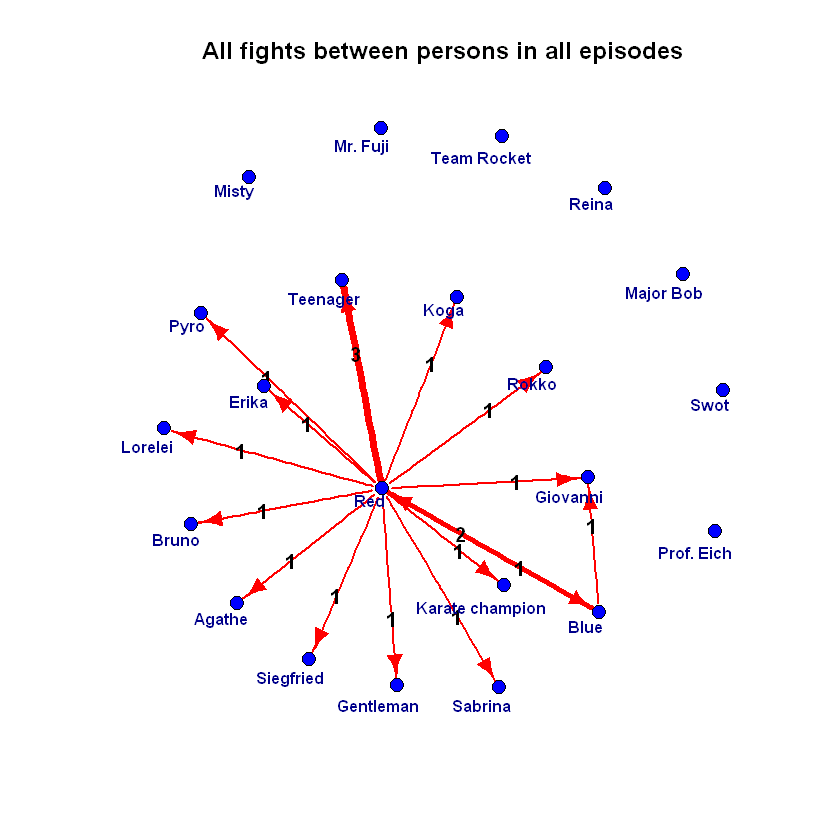

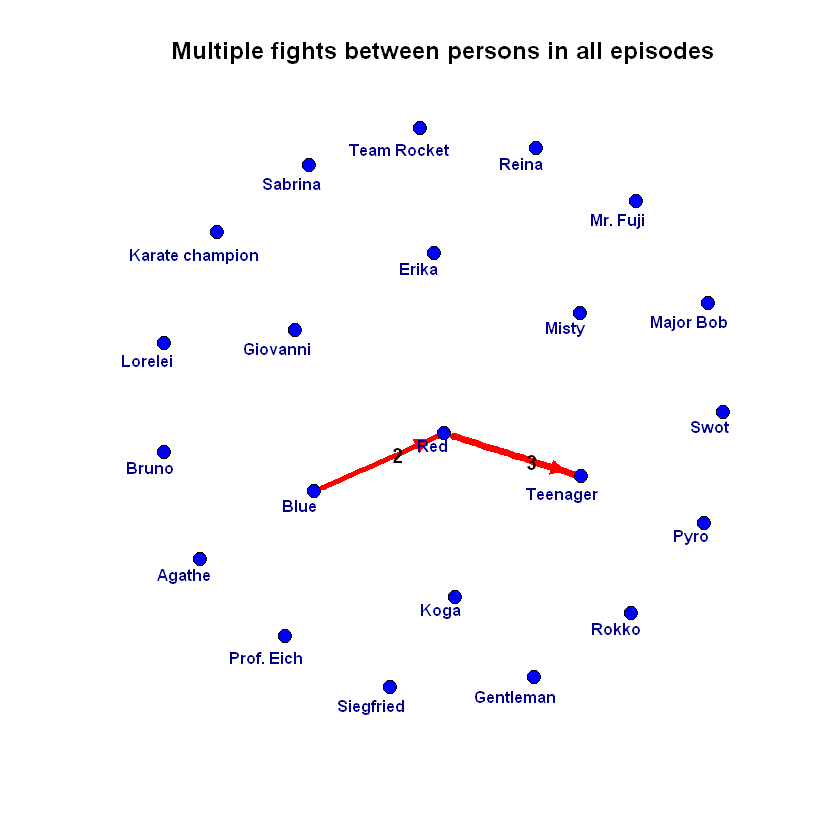

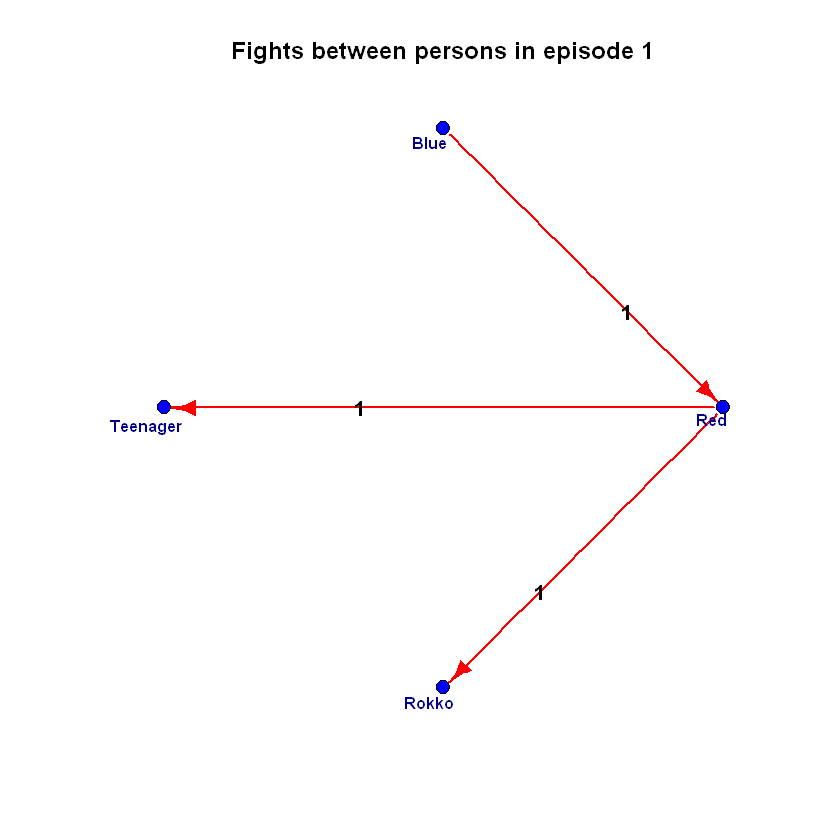

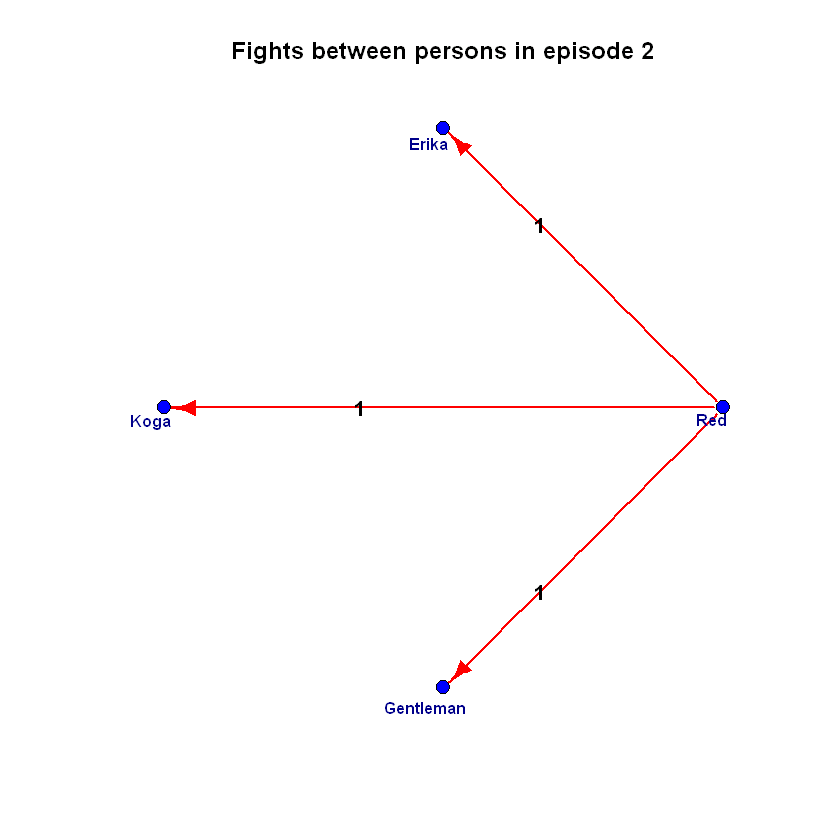

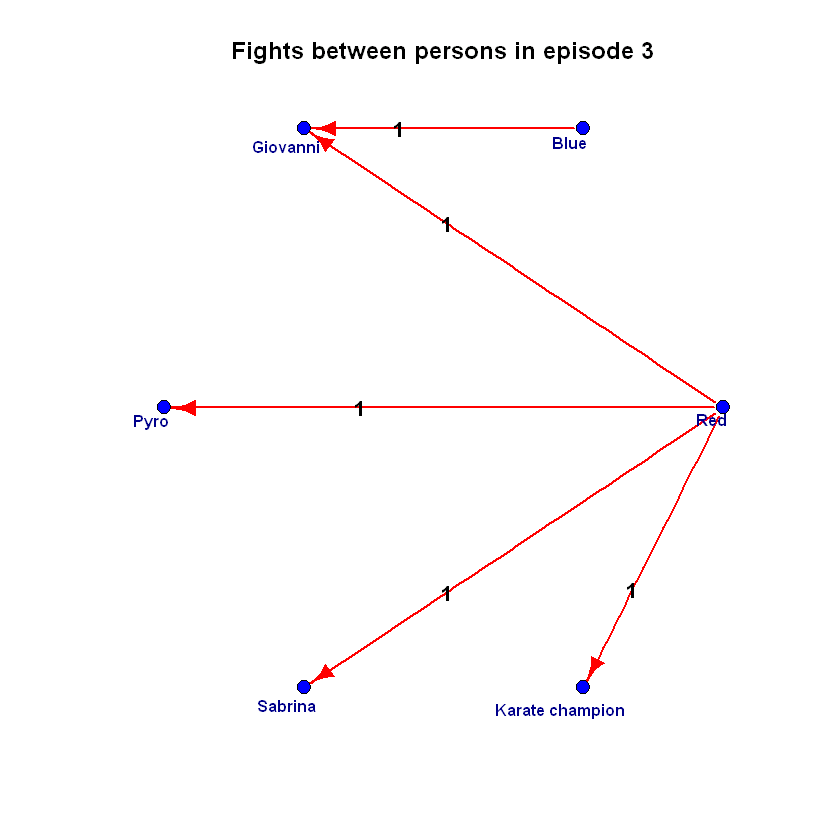

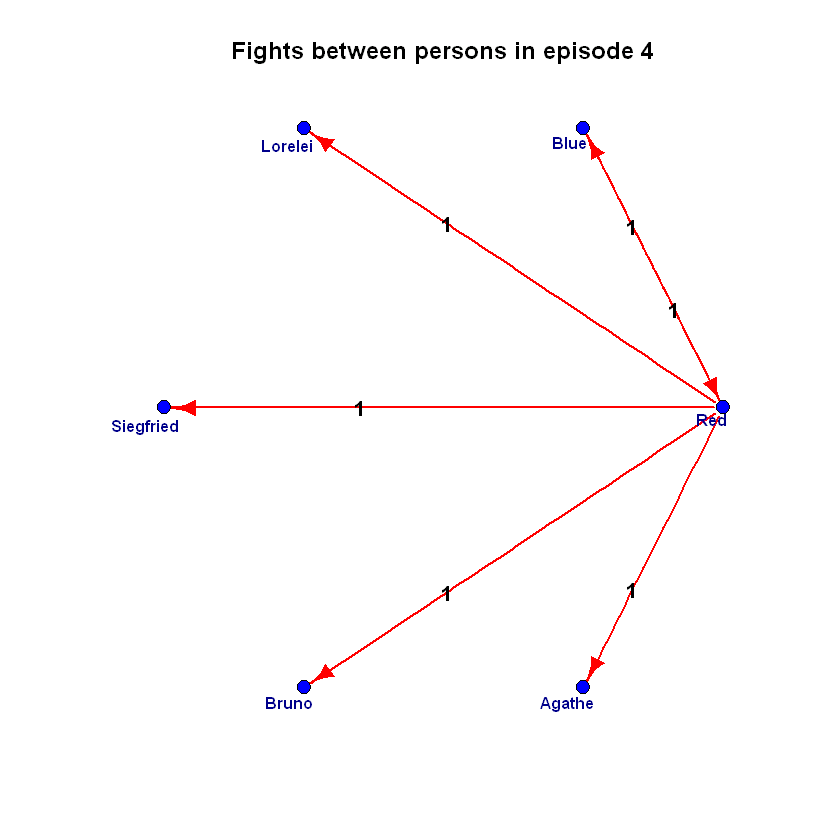

In [9]:
# create person-vs-person graphs G and adjacency matrices M

# all persons
G_pVp_all <- graph.data.frame(d_pers2pers, directed=TRUE, vertices=select(df_pers,Name))
M_pVp_all <- get.adjacency(G_pVp_all)

# persons in episode 1
d_pers2pers_e1 <- filter(d_pers2pers, Episode1==1)
G_pVp_e1  <- graph.data.frame(d_pers2pers_e1, directed=TRUE, vertices=NULL)
M_pVp_e1 <- get.adjacency(G_pVp_e1)

# persons in episode 2
d_pers2pers_e2 <- filter(d_pers2pers, Episode2==1)
G_pVp_e2  <- graph.data.frame(d_pers2pers_e2, directed=TRUE, vertices=NULL)
M_pVp_e2 <- get.adjacency(G_pVp_e2)

# persons in episode 3
d_pers2pers_e3 <- filter(d_pers2pers, Episode3==1)
G_pVp_e3  <- graph.data.frame(d_pers2pers_e3, directed=TRUE, vertices=NULL)
M_pVp_e3 <- get.adjacency(G_pVp_e3)

# persons in episode 4
d_pers2pers_e4 <- filter(d_pers2pers, Episode4==1)
G_pVp_e4  <- graph.data.frame(d_pers2pers_e4, directed=TRUE, vertices=NULL)
M_pVp_e4 <- get.adjacency(G_pVp_e4)

# plot the graphs

# all person-VS-person fights
plot.igraph(G_pVp_all,
            main = "All fights between persons in all episodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = E(G_pVp_all)$Total,
            edge.width          = E(G_pVp_all)$Total*2,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

# all person-VS-person multi-fights
G_pVp_all_mf <- delete.edges(G_pVp_all, E(G_pVp_all)[E(G_pVp_all)$Total < 2])
plot.igraph(G_pVp_all_mf,
            main = "Multiple fights between persons in all episodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = E(G_pVp_all_mf)$Total,
            edge.width          = E(G_pVp_all_mf)$Total*2,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

# episode1: person-VS-person fights
plot.igraph(G_pVp_e1,
            main = "Fights between persons in episode 1",
            layout=layout.circle,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = E(G_pVp_e1)$Episode1,
            edge.width          = E(G_pVp_e1)$Episode1*2,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

# episode2: person-VS-person fights
plot.igraph(G_pVp_e2,
            main = "Fights between persons in episode 2",
            layout=layout.circle,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = E(G_pVp_e2)$Episode2,
            edge.width          = E(G_pVp_e2)$Episode2*2,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

# episode3: person-VS-person fights
plot.igraph(G_pVp_e3,
            main = "Fights between persons in episode 3",
            layout=layout.circle,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = E(G_pVp_e3)$Episode3,
            edge.width          = E(G_pVp_e3)$Episode3*2,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

# episode4: person-VS-person fights
plot.igraph(G_pVp_e4,
            main = "Fights between persons in episode 4",
            layout=layout.circle,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = E(G_pVp_e4)$Episode4,
            edge.width          = E(G_pVp_e4)$Episode4*2,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

IGRAPH DN-- 22 16 -- 
+ attr: name (v/c), Episode1 (e/n), Episode2 (e/n), Episode3 (e/n),
| Episode4 (e/n), Total (e/n)
graph density: ~ 0.03463203 
mean degree: ~ 1.454545

[1] 8

[1]  1 15  1  1  1  1  1  1

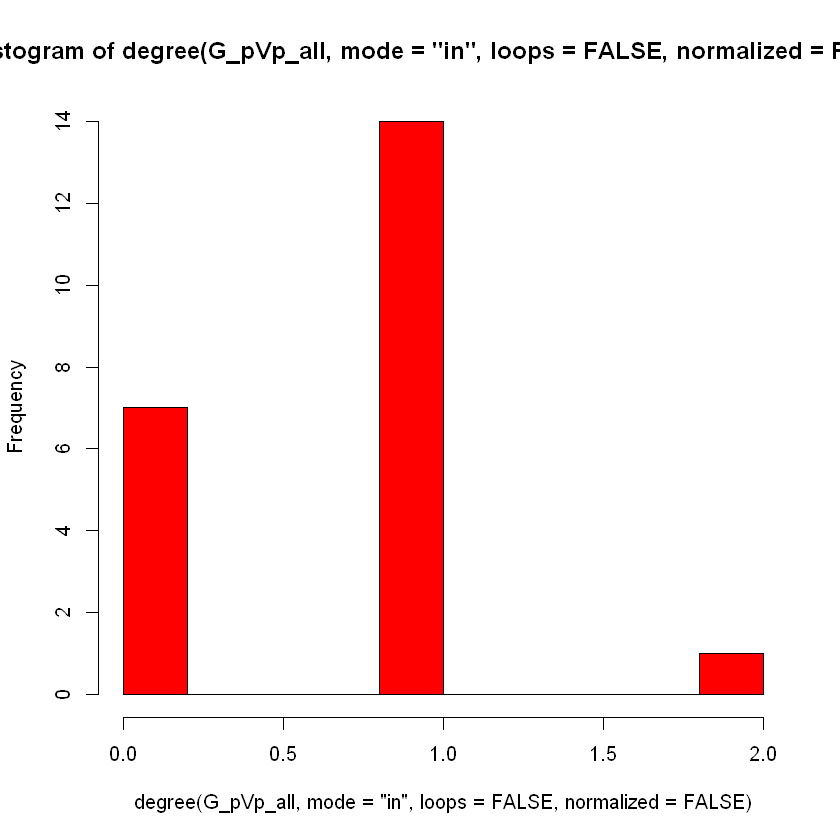

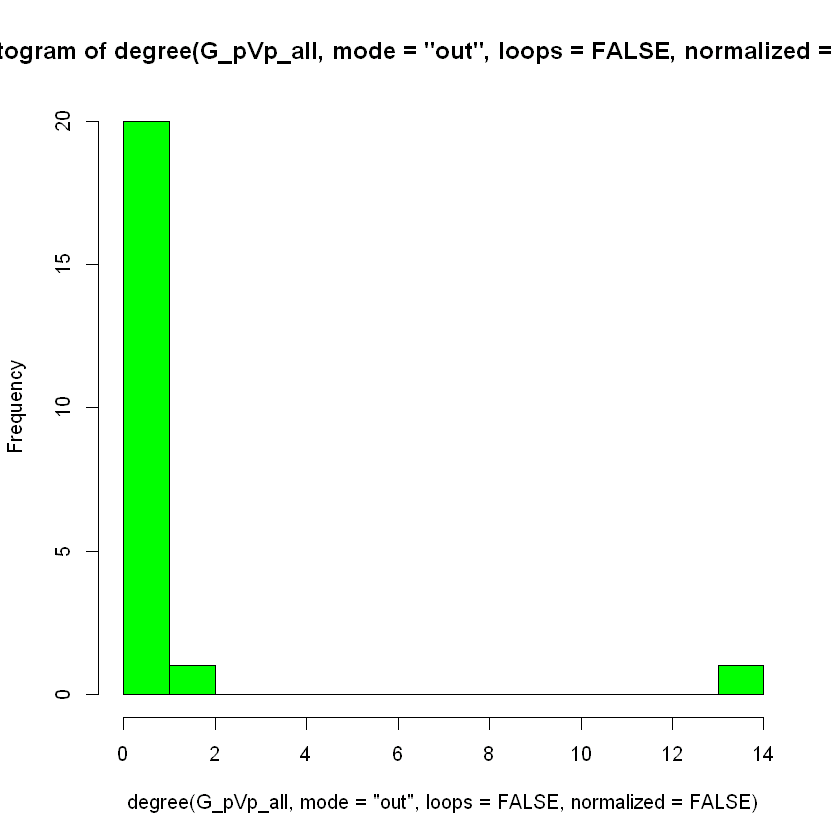

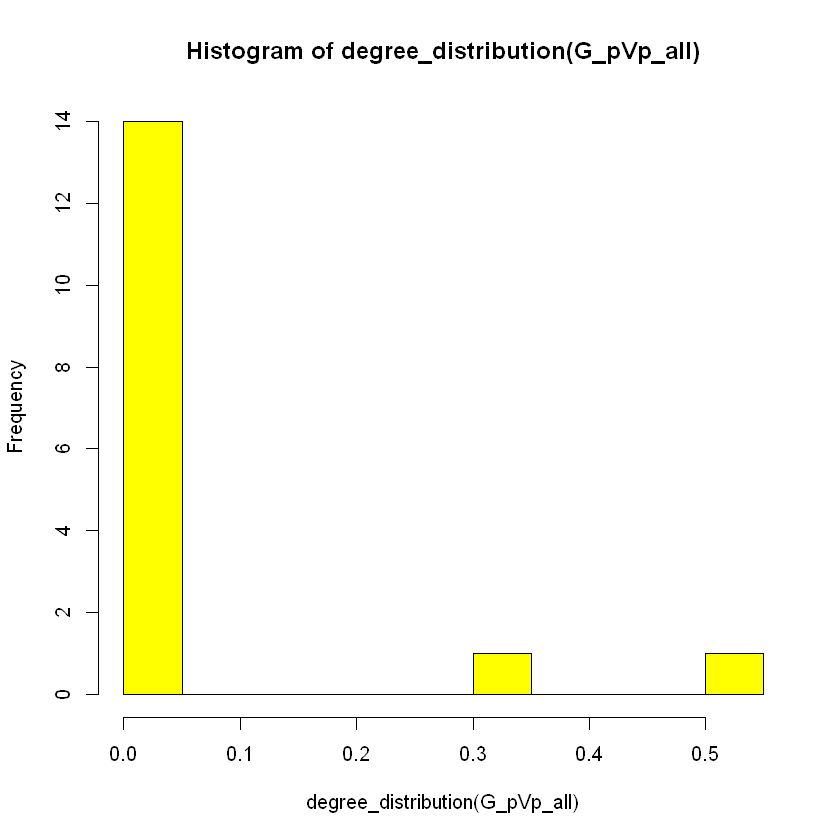

In [10]:
# fights within all persons
summary(G_pVp_all)                                                                                           # summary of graph
cat(cat("graph density: ~",graph.density(G_pVp_all, loops=FALSE)),'\n')                                      # density
cat("mean degree: ~",mean(degree(G_pVp_all)))                                                                # mean degree
clusters(G_pVp_all)$no                                                                                       # number of clusters
clusters(G_pVp_all)$csize                                                                                    # cluster components
d_in_ap  <- degree(G_pVp_all, v = V(G_pVp_all), mode = c("in"), loops = FALSE, normalized = FALSE)           # in-degree
d_out_ap <- degree(G_pVp_all, v = V(G_pVp_all), mode = c("out"), loops = FALSE, normalized = FALSE)          # out-degree
histo_in  <- hist(degree(G_pVp_all, mode = "in", loops = FALSE, normalized = FALSE), 10, col="red")          # in-degree histogram
histo_out <- hist(degree(G_pVp_all, mode = "out", loops = FALSE, normalized = FALSE), 10, col="green")       # out-degree histogram
hist(degree_distribution(G_pVp_all), 10, col="yellow")                                                       # degree distribution

IGRAPH DN-- 4 3 -- 
+ attr: name (v/c), Episode1 (e/n), Episode2 (e/n), Episode3 (e/n),
| Episode4 (e/n), Total (e/n)
graph density: ~ 0.25 
mean degree: ~ 1.5

[1] 1

[1] 4

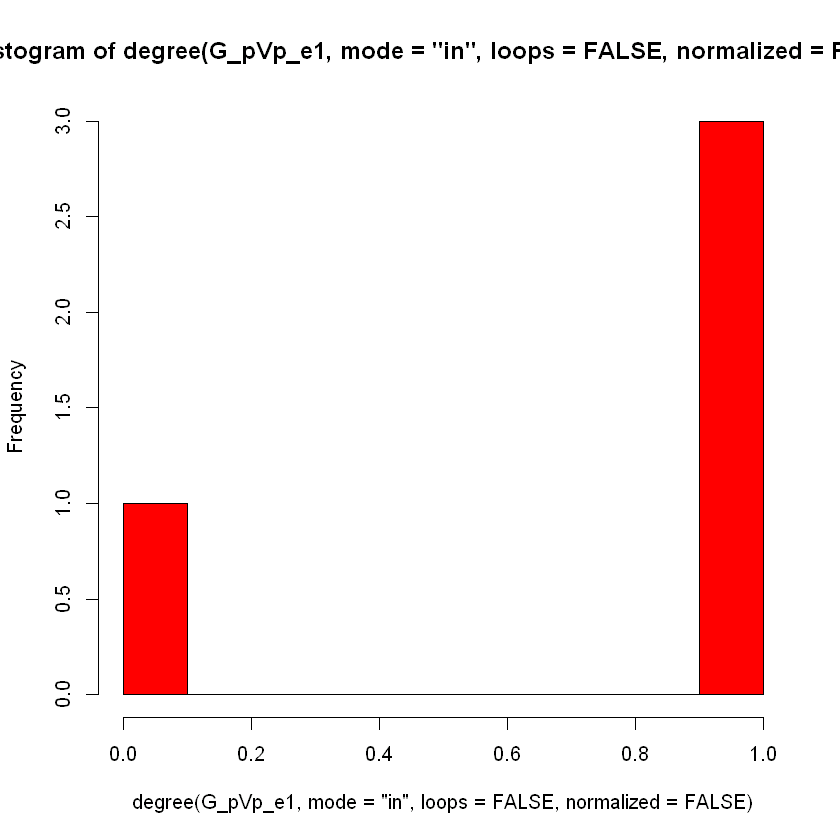

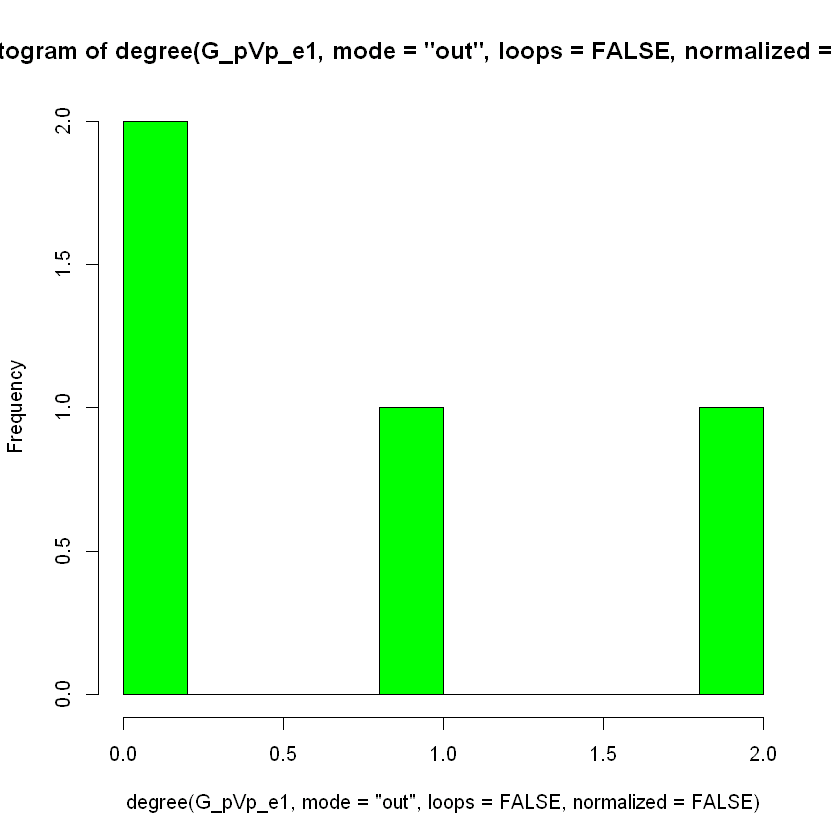

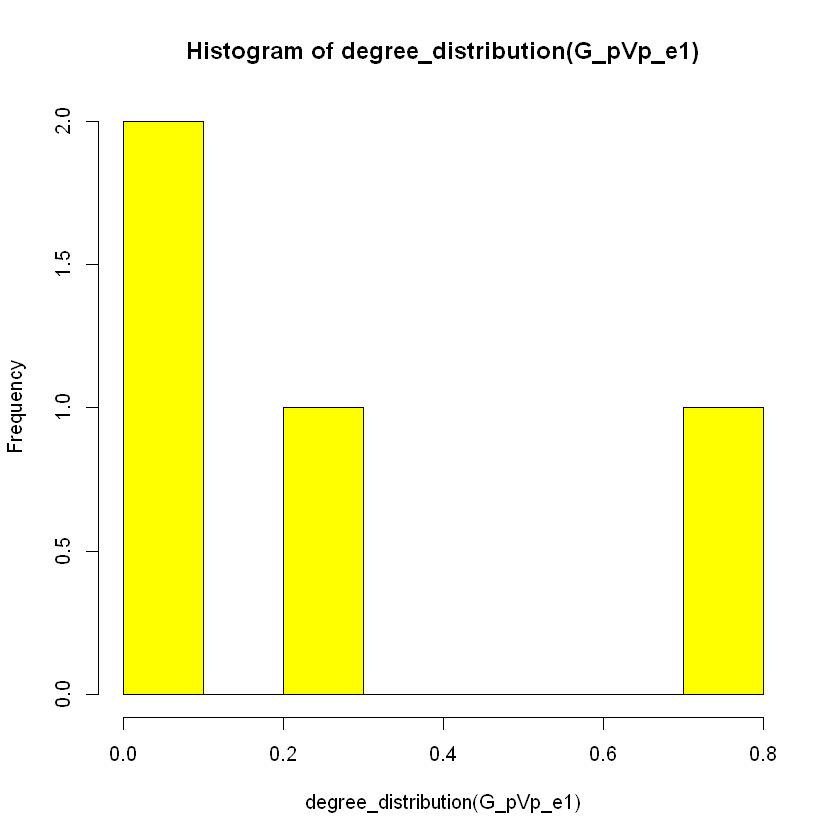

In [11]:
# fights within all persons
summary(G_pVp_e1)                                                                                           # summary of graph
cat(cat("graph density: ~",graph.density(G_pVp_e1,  loops=FALSE)),'\n')                                     # density
cat("mean degree: ~",mean(degree(G_pVp_e1)))                                                                # mean degree
clusters(G_pVp_e1)$no                                                                                       # number of clusters
clusters(G_pVp_e1)$csize                                                                                    # cluster components
d_in_ap  <- degree(G_pVp_e1, v = V(G_pVp_e1), mode = c("in"), loops = FALSE, normalized = FALSE)            # in-degree
d_out_ap <- degree(G_pVp_e1, v = V(G_pVp_e1), mode = c("out"), loops = FALSE, normalized = FALSE)           # out-degree
histo_in  <- hist(degree(G_pVp_e1, mode = "in", loops = FALSE, normalized = FALSE), 10, col="red")          # in-degree histogram
histo_out <- hist(degree(G_pVp_e1, mode = "out", loops = FALSE, normalized = FALSE), 10, col="green")       # out-degree histogram
hist(degree_distribution(G_pVp_e1), 10, col="yellow")                                                       # degree distribution

IGRAPH DN-- 4 3 -- 
+ attr: name (v/c), Episode1 (e/n), Episode2 (e/n), Episode3 (e/n),
| Episode4 (e/n), Total (e/n)
graph density: ~ 0.25 
mean degree: ~ 1.5

[1] 1

[1] 4

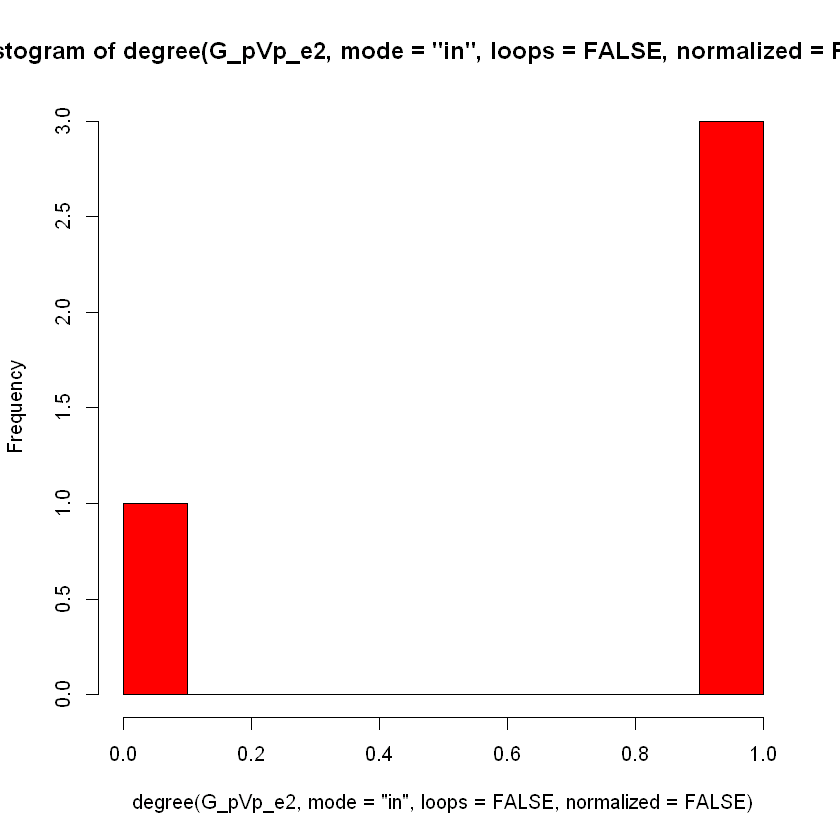

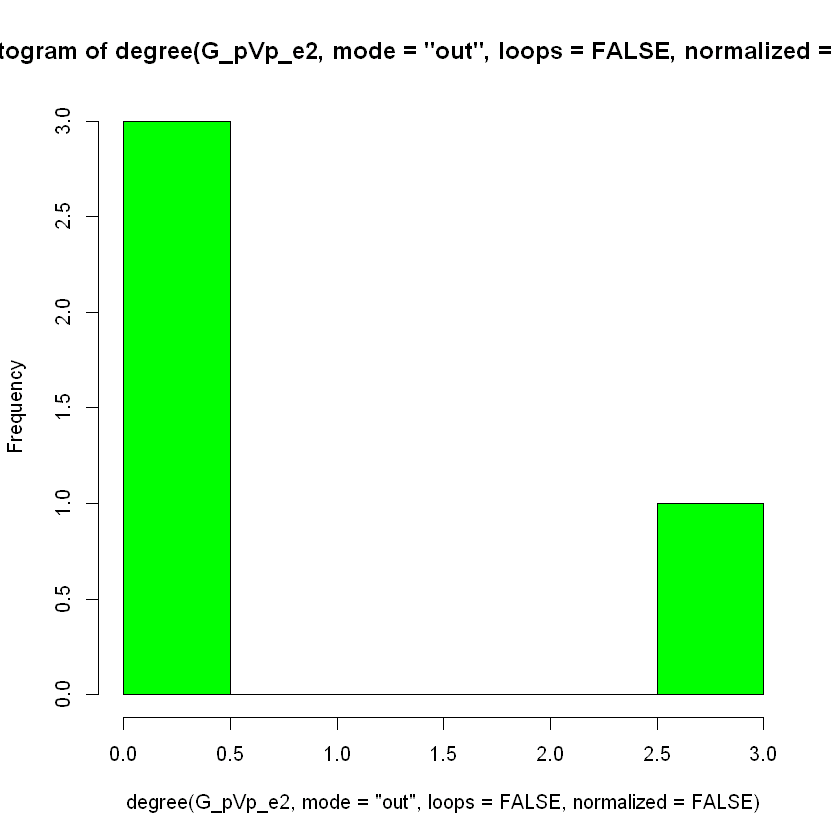

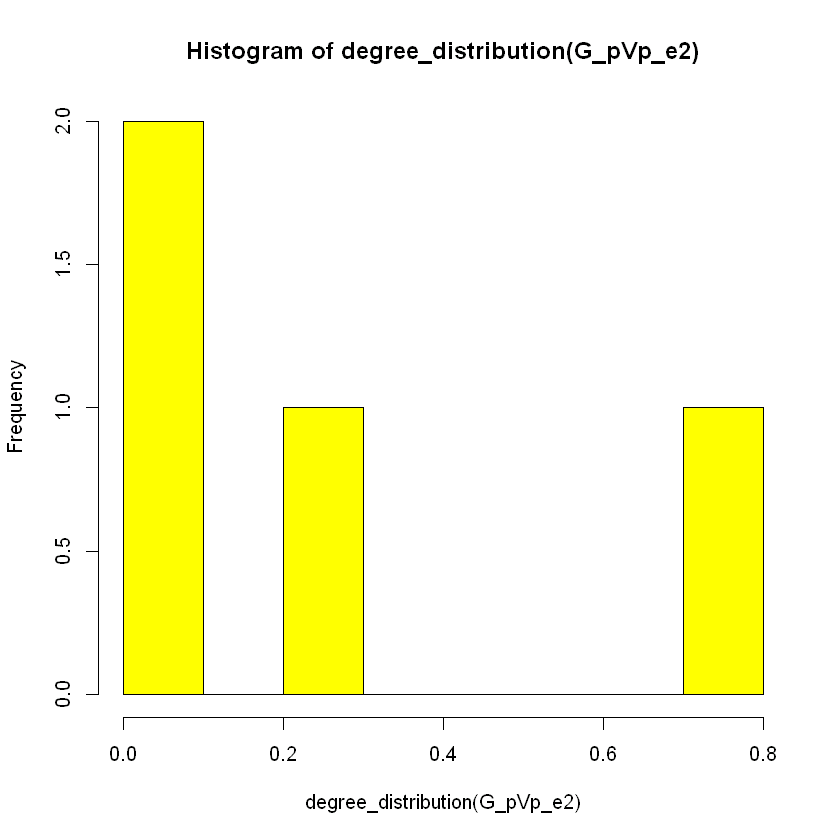

In [12]:
# fights within all persons in episode 2
summary(G_pVp_e2)                                                                                           # summary of graph
cat(cat("graph density: ~",graph.density(G_pVp_e2,  loops=FALSE)),'\n')                                     # density
cat("mean degree: ~",mean(degree(G_pVp_e2)))                                                                # mean degree
clusters(G_pVp_e2)$no                                                                                       # number of clusters
clusters(G_pVp_e2)$csize                                                                                    # cluster components
d_in_ap  <- degree(G_pVp_e2, v = V(G_pVp_e2), mode = c("in"), loops = FALSE, normalized = FALSE)            # in-degree
d_out_ap <- degree(G_pVp_e2, v = V(G_pVp_e2), mode = c("out"), loops = FALSE, normalized = FALSE)           # out-degree
histo_in  <- hist(degree(G_pVp_e2, mode = "in", loops = FALSE, normalized = FALSE), 10, col="red")          # in-degree histogram
histo_out <- hist(degree(G_pVp_e2, mode = "out", loops = FALSE, normalized = FALSE), 10, col="green")       # out-degree histogram
hist(degree_distribution(G_pVp_e2), 10, col="yellow")                                                       # degree distribution

IGRAPH DN-- 6 5 -- 
+ attr: name (v/c), Episode1 (e/n), Episode2 (e/n), Episode3 (e/n),
| Episode4 (e/n), Total (e/n)
graph density: ~ 0.1666667 
mean degree: ~ 1.666667

[1] 1

[1] 6

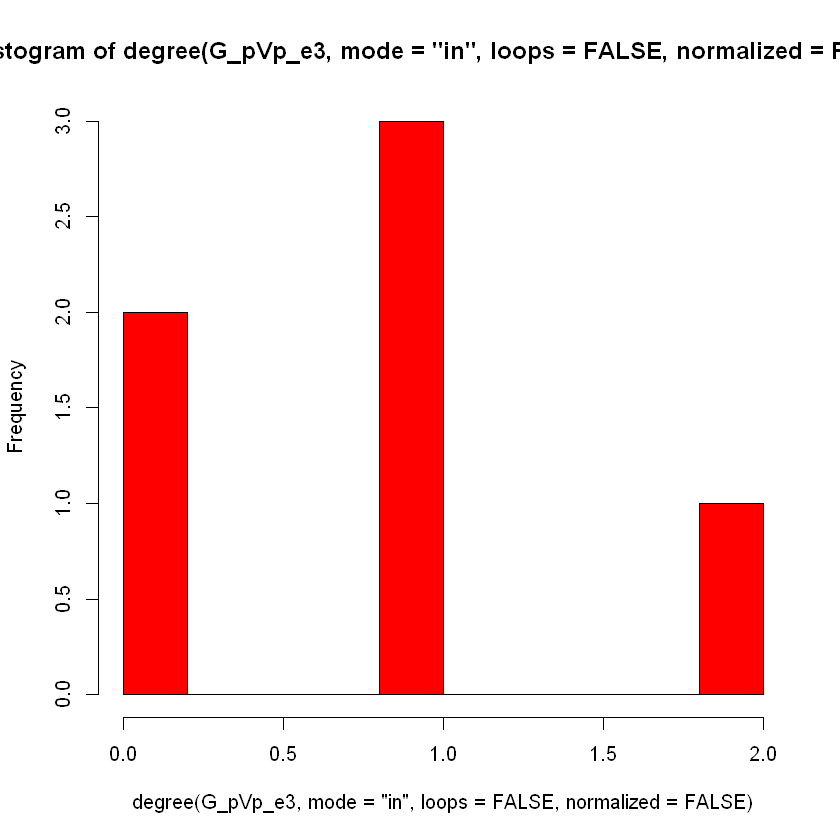

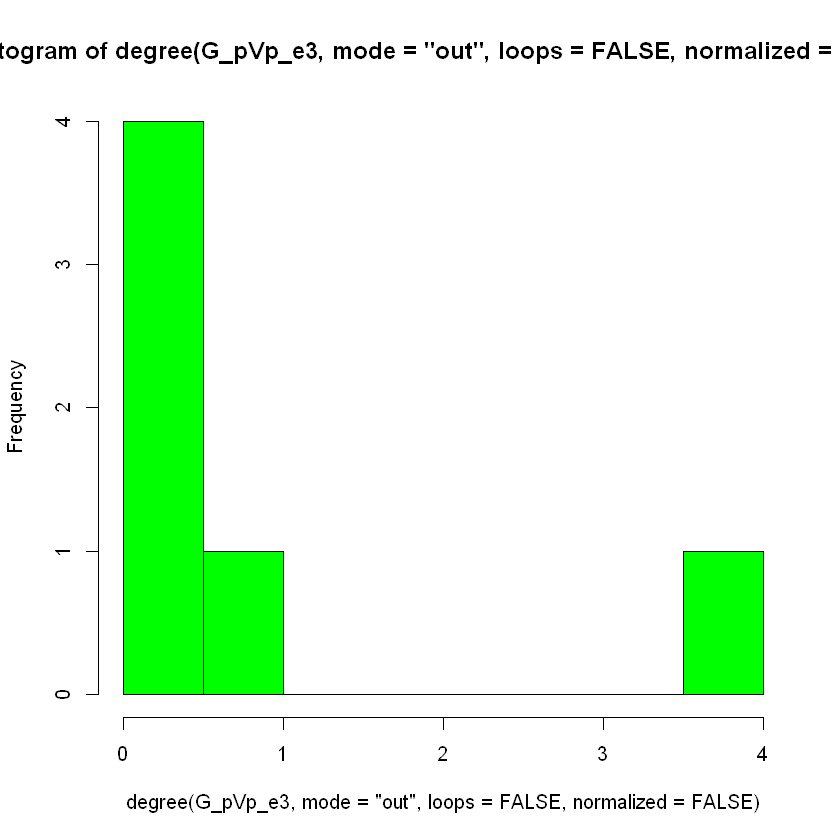

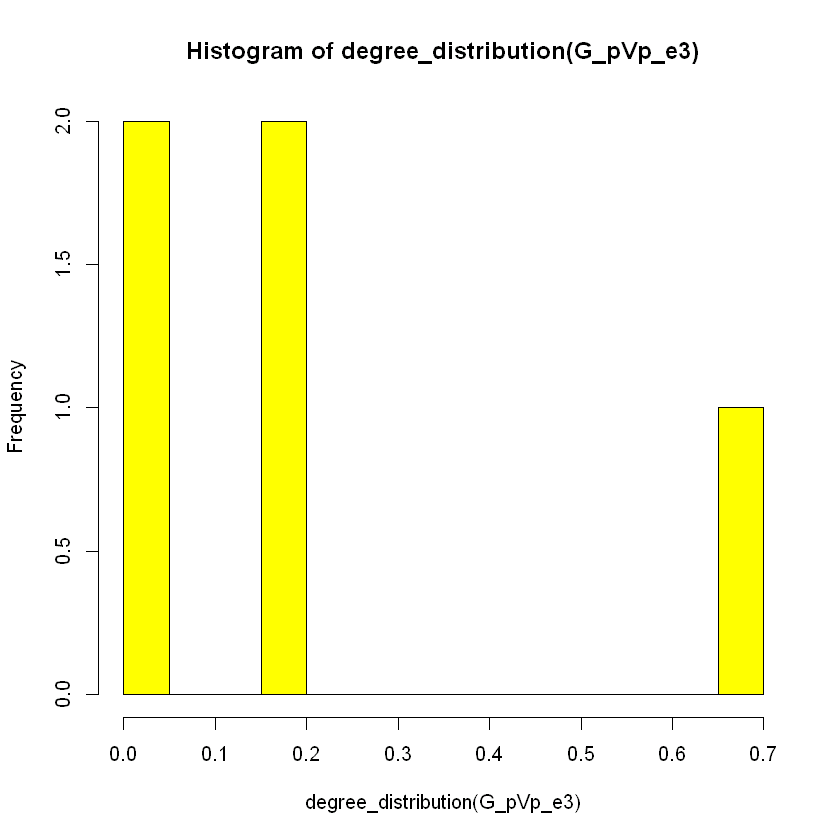

In [13]:
# fights within all persons in episode 3
summary(G_pVp_e3)                                                                                           # summary of graph
cat(cat("graph density: ~",graph.density(G_pVp_e3,  loops=FALSE)),'\n')                                     # density
cat("mean degree: ~",mean(degree(G_pVp_e3)))                                                                # mean degree
clusters(G_pVp_e3)$no                                                                                       # number of clusters
clusters(G_pVp_e3)$csize                                                                                    # cluster components
d_in_ap  <- degree(G_pVp_e3, v = V(G_pVp_e3), mode = c("in"), loops = FALSE, normalized = FALSE)            # in-degree
d_out_ap <- degree(G_pVp_e3, v = V(G_pVp_e3), mode = c("out"), loops = FALSE, normalized = FALSE)           # out-degree
histo_in  <- hist(degree(G_pVp_e3, mode = "in", loops = FALSE, normalized = FALSE), 10, col="red")          # in-degree histogram
histo_out <- hist(degree(G_pVp_e3, mode = "out", loops = FALSE, normalized = FALSE), 10, col="green")       # out-degree histogram
hist(degree_distribution(G_pVp_e3), 10, col="yellow")                                                       # degree distribution

IGRAPH DN-- 6 6 -- 
+ attr: name (v/c), Episode1 (e/n), Episode2 (e/n), Episode3 (e/n),
| Episode4 (e/n), Total (e/n)
graph density: ~ 0.2 
mean degree: ~ 2

[1] 1

[1] 6

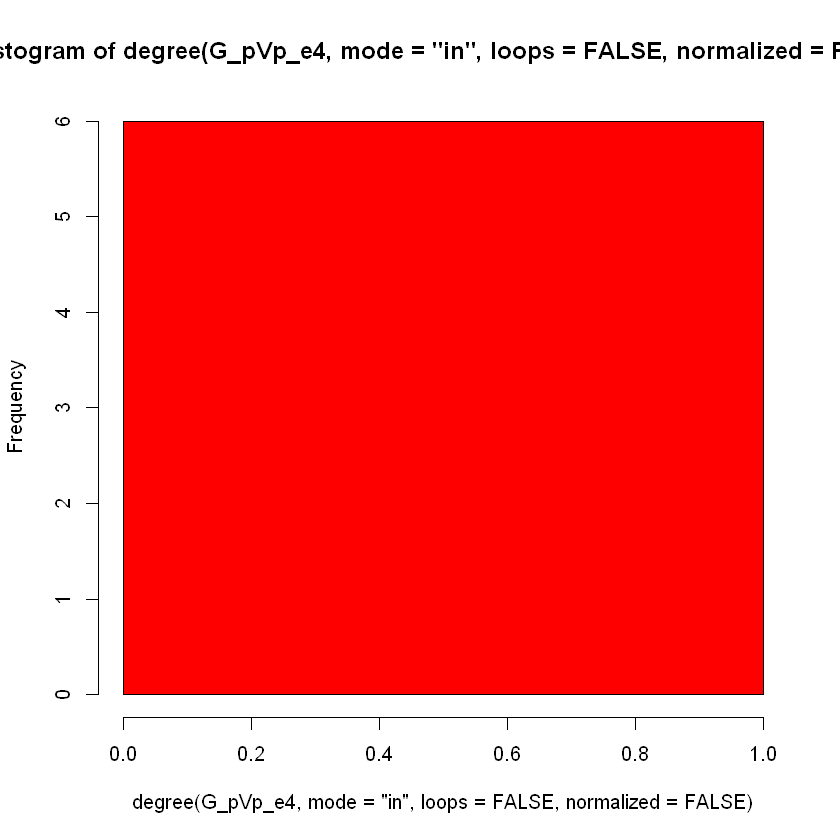

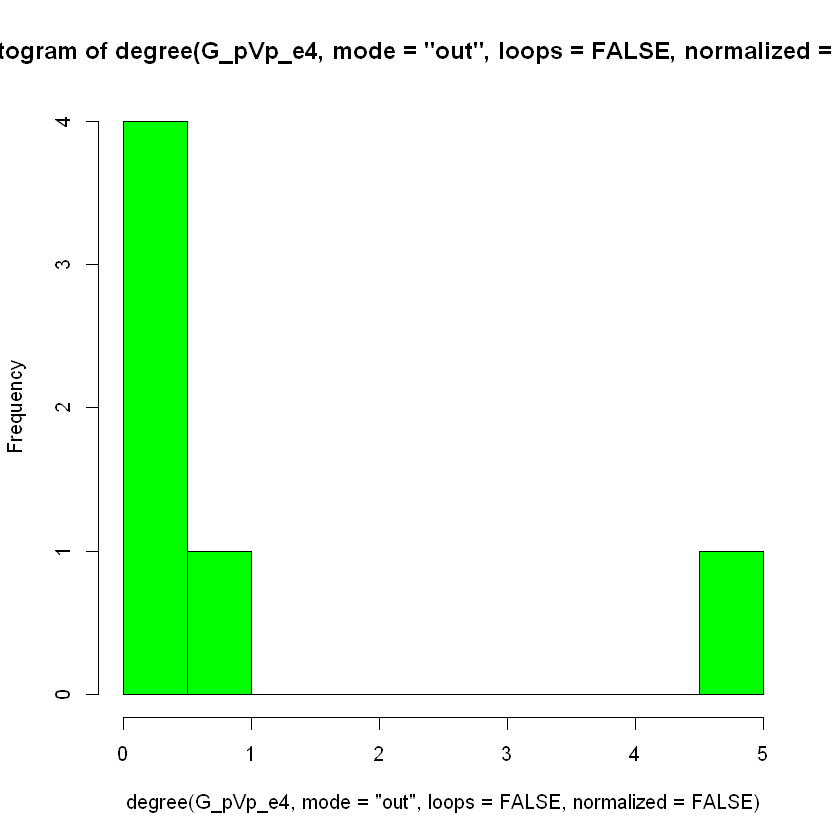

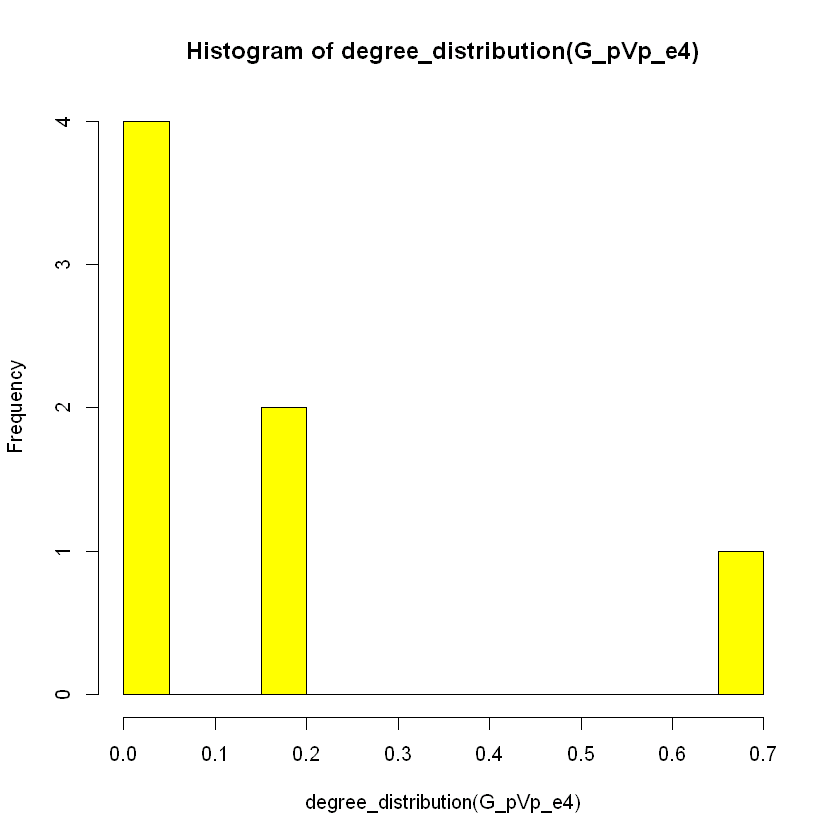

In [14]:
# fights within all persons in episode 4
summary(G_pVp_e4)                                                                                           # summary of graph
cat(cat("graph density: ~",graph.density(G_pVp_e4,  loops=FALSE)),'\n')                                     # density
cat("mean degree: ~",mean(degree(G_pVp_e4)))                                                                # mean degree
clusters(G_pVp_e4)$no                                                                                       # number of clusters
clusters(G_pVp_e4)$csize                                                                                    # cluster components
d_in_ap  <- degree(G_pVp_e4, v = V(G_pVp_e4), mode = c("in"), loops = FALSE, normalized = FALSE)            # in-degree
d_out_ap <- degree(G_pVp_e4, v = V(G_pVp_e4), mode = c("out"), loops = FALSE, normalized = FALSE)           # out-degree
histo_in  <- hist(degree(G_pVp_e4, mode = "in", loops = FALSE, normalized = FALSE), 10, col="red")          # in-degree histogram
histo_out <- hist(degree(G_pVp_e4, mode = "out", loops = FALSE, normalized = FALSE), 10, col="green")       # out-degree histogram
hist(degree_distribution(G_pVp_e4), 10, col="yellow")                                                       # degree distribution

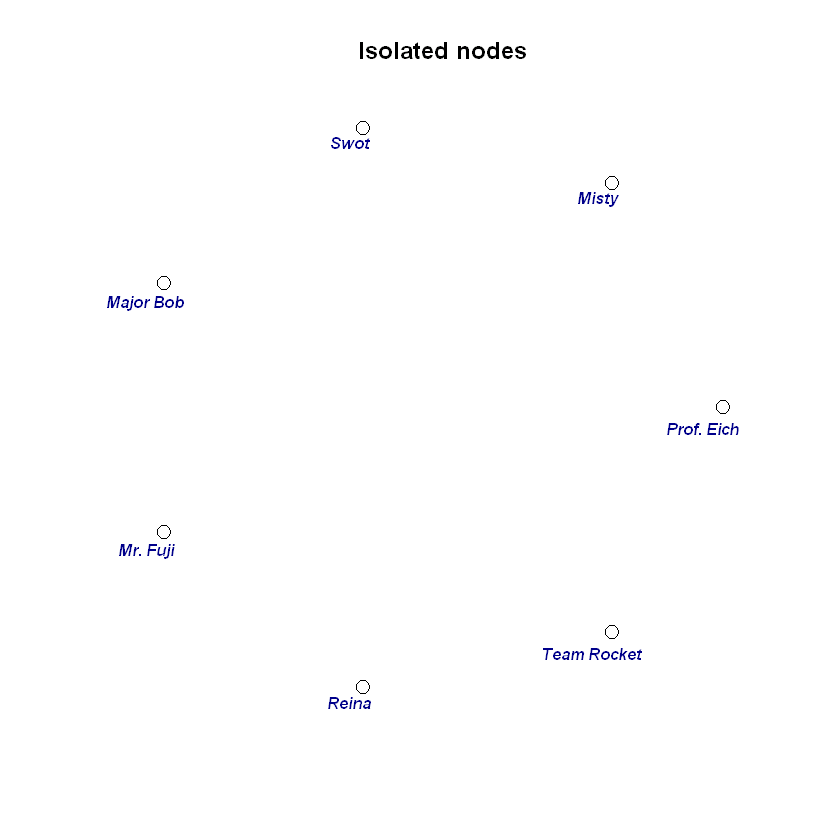

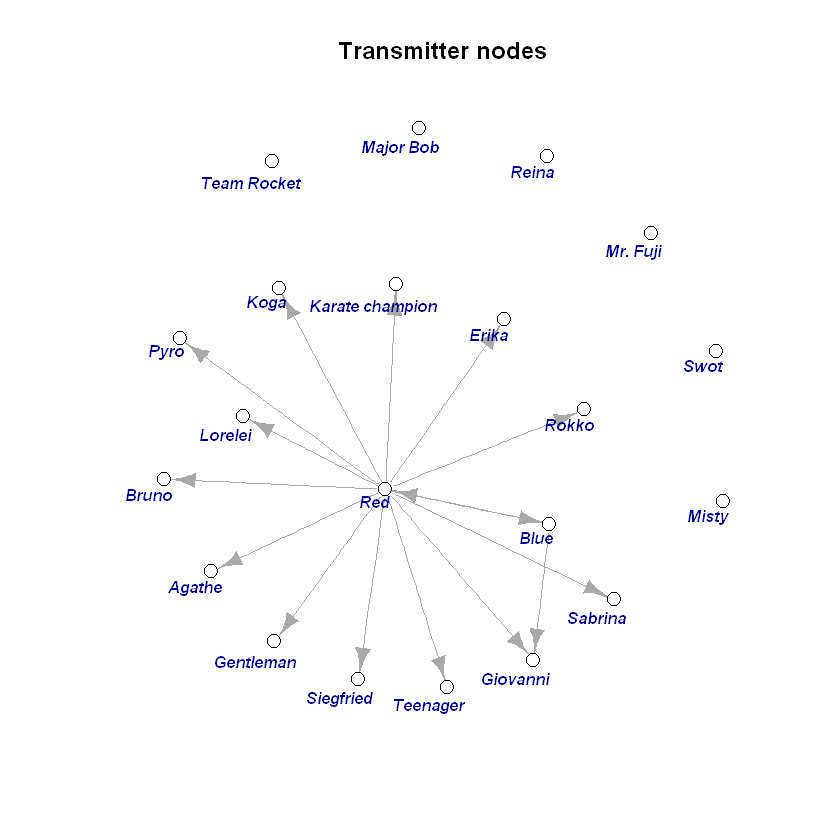

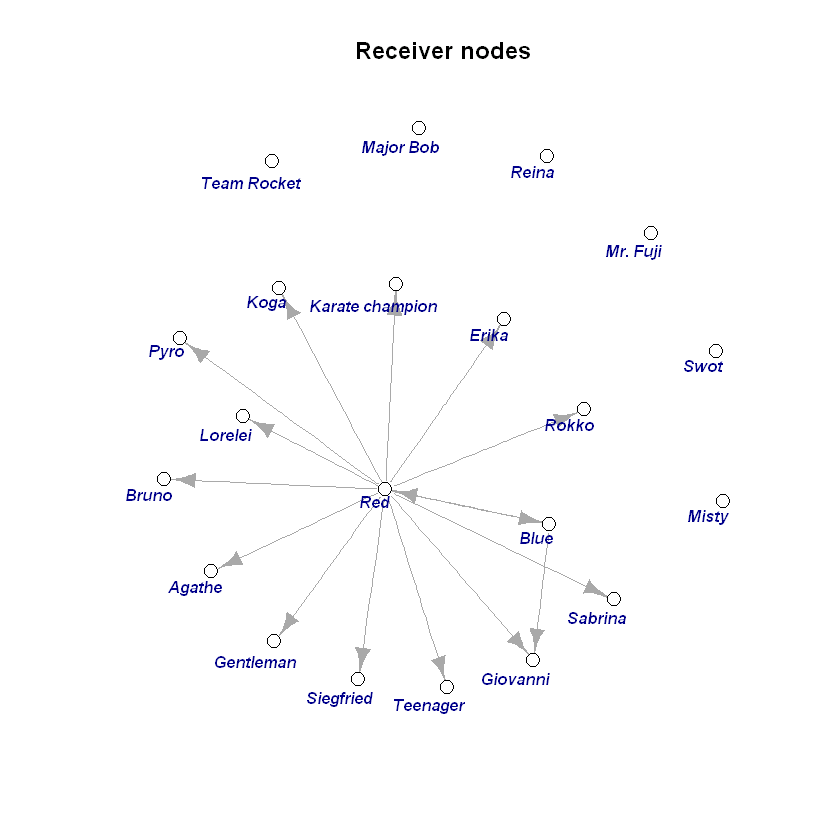

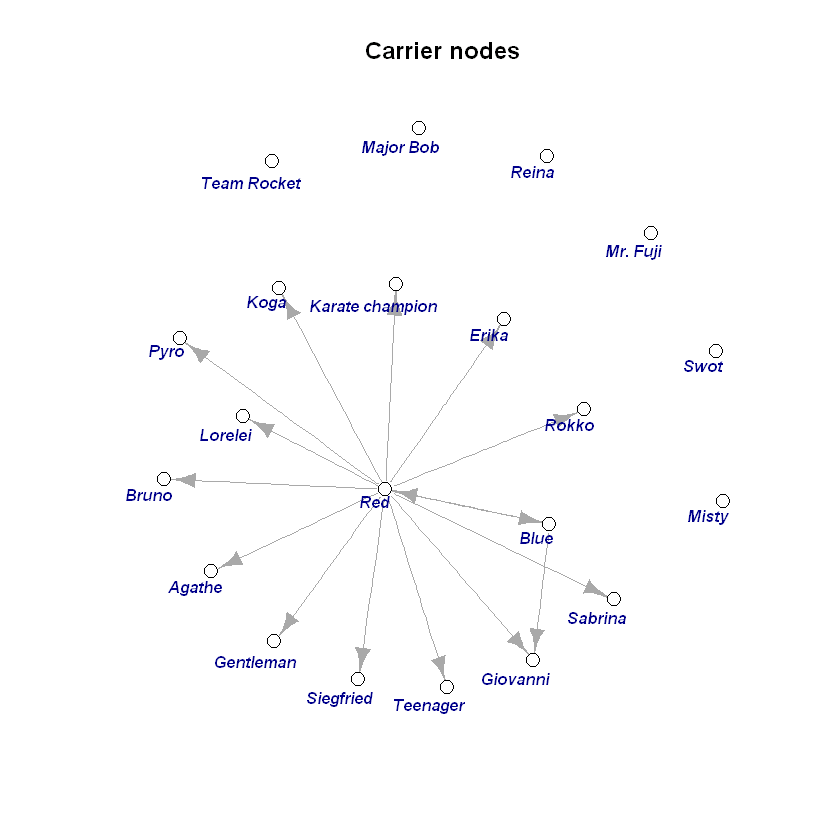

In [15]:
# node types
G_pers_iso <- delete.vertices(G_pVp_all, which(!(degree(G_pVp_all, mode = "all") == 0)))
G_pers_tra <- delete.vertices(G_pVp_all, which(!((degree(G_pVp_all, mode = "in") == 0) && (degree(G_pVp_all, mode = "out") > 0))))
G_pers_rec <- delete.vertices(G_pVp_all, which(!((degree(G_pVp_all, mode = "in") > 0) && (degree(G_pVp_all, mode = "out") == 0))))
G_pers_car <- delete.vertices(G_pVp_all, which(!((degree(G_pVp_all, mode = "in") > 0) && (degree(G_pVp_all, mode = "out") > 0))))

# plot the graphs
plot.igraph(G_pers_iso,
            main = "Isolated nodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'white',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,       
           )

plot.igraph(G_pers_tra,
            main = "Transmitter nodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'white',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,       
           )

plot.igraph(G_pers_rec,
            main = "Receiver nodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'white',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,       
           )

plot.igraph(G_pers_car,
            main = "Carrier nodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'white',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,       
           )

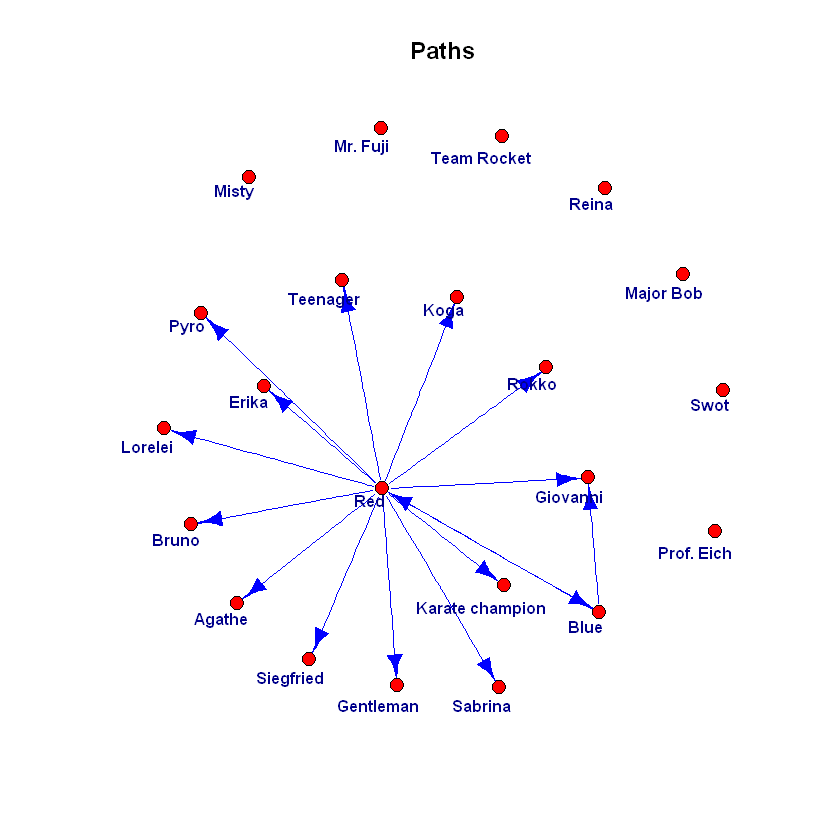

In [16]:
# all persons
paths_L1  <- M_pVp_all
paths_L2  <- M_pVp_all * M_pVp_all
paths_L3  <- M_pVp_all * M_pVp_all * M_pVp_all
paths_L4  <- M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all
paths_L5  <- M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all
paths_L6  <- M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all
paths_L7  <- M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all
paths_L8  <- M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all
paths_L9  <- M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all
paths_L10 <- M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all * M_pVp_all

g1 <- graph.adjacency(paths_L6, mode=c("directed"), weighted=NULL, diag=FALSE, add.colnames=NULL, add.rownames=NA)
g2 <- graph.adjacency(paths_L6, mode=c("directed"), weighted=NULL, diag=FALSE, add.colnames=NULL, add.rownames=NA)
g3 <- graph.adjacency(paths_L6, mode=c("directed"), weighted=NULL, diag=FALSE, add.colnames=NULL, add.rownames=NA)
g4 <- graph.adjacency(paths_L6, mode=c("directed"), weighted=NULL, diag=FALSE, add.colnames=NULL, add.rownames=NA)
g5 <- graph.adjacency(paths_L6, mode=c("directed"), weighted=NULL, diag=FALSE, add.colnames=NULL, add.rownames=NA)
g6 <- graph.adjacency(paths_L6, mode=c("directed"), weighted=NULL, diag=FALSE, add.colnames=NULL, add.rownames=NA)
g7 <- graph.adjacency(paths_L6, mode=c("directed"), weighted=NULL, diag=FALSE, add.colnames=NULL, add.rownames=NA)
g8 <- graph.adjacency(paths_L6, mode=c("directed"), weighted=NULL, diag=FALSE, add.colnames=NULL, add.rownames=NA)
g9 <- graph.adjacency(paths_L6, mode=c("directed"), weighted=NULL, diag=FALSE, add.colnames=NULL, add.rownames=NA)
g10 <- graph.adjacency(paths_L6, mode=c("directed"), weighted=NULL, diag=FALSE, add.colnames=NULL, add.rownames=NA)

plot.igraph(g1,
            main = "Paths",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'red',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = 1,
            edge.color          = 'blue',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

plot.igraph(g2,
            main = "Paths",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'red',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = 1,
            edge.color          = 'blue',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

plot.igraph(g3,
            main = "Paths",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'red',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = 1,
            edge.color          = 'blue',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

plot.igraph(g4,
            main = "Paths",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'red',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = 1,
            edge.color          = 'blue',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

plot.igraph(g5,
            main = "Paths",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'red',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = 1,
            edge.color          = 'blue',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

plot.igraph(g6,
            main = "Paths",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'red',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = 1,
            edge.color          = 'blue',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

plot.igraph(g7,
            main = "Paths",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'red',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = 1,
            edge.color          = 'blue',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

plot.igraph(g8,
            main = "Paths",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'red',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = 1,
            edge.color          = 'blue',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

plot.igraph(g9,
            main = "Paths",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'red',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = 1,
            edge.color          = 'blue',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

plot.igraph(g10,
            main = "Paths",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'red',
            vertex.label.family = 'sans',
            vertex.label.font   = 2,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = 1,
            edge.color          = 'blue',
            edge.label.family   = 'sans',
            edge.label.font     = 2,
            edge.label.color    = 'black'            
           )

# persons in episode 1
#M_pVp_e1

# persons in episode 2
#M_pVp_e2

# persons in episode 3
#M_pVp_e3

# persons in episode 4
#M_pVp_e4

[1] 1.428571

$res
[1] 16 12

$unconnected
[1] 434

Prof. Eich             Red            Blue        Teenager           Rokko 
              0               1               2               2               2 
          Misty            Swot       Major Bob        Mr. Fuji           Reina 
              0               0               0               0               0 
    Team Rocket           Erika            Koga       Gentleman        Giovanni 
              0               2               2               2               2 
        Sabrina Karate champion            Pyro         Lorelei           Bruno 
              2               2               2               2               2 
         Agathe       Siegfried 
              2               2

Prof. Eich             Red            Blue        Teenager           Rokko 
              0               1               1               2               2 
          Misty            Swot       Major Bob        Mr. Fuji           Reina 
              0               0               0               0               0 
    Team Rocket           Erika            Koga       Gentleman        Giovanni 
              0               2               2               2               1 
        Sabrina Karate champion            Pyro         Lorelei           Bruno 
              2               2               2               2               2 
         Agathe       Siegfried 
              2               2

Prof. Eich             Red            Blue        Teenager           Rokko 
              0               1               2               0               0 
          Misty            Swot       Major Bob        Mr. Fuji           Reina 
              0               0               0               0               0 
    Team Rocket           Erika            Koga       Gentleman        Giovanni 
              0               0               0               0               0 
        Sabrina Karate champion            Pyro         Lorelei           Bruno 
              0               0               0               0               0 
         Agathe       Siegfried 
              0               0

[1] 2

$membership
     Prof. Eich             Red            Blue        Teenager           Rokko 
              1               2               2               2               2 
          Misty            Swot       Major Bob        Mr. Fuji           Reina 
              3               4               5               6               7 
    Team Rocket           Erika            Koga       Gentleman        Giovanni 
              8               2               2               2               2 
        Sabrina Karate champion            Pyro         Lorelei           Bruno 
              2               2               2               2               2 
         Agathe       Siegfried 
              2               2 

$csize
[1]  1 15  1  1  1  1  1  1

$no
[1] 8

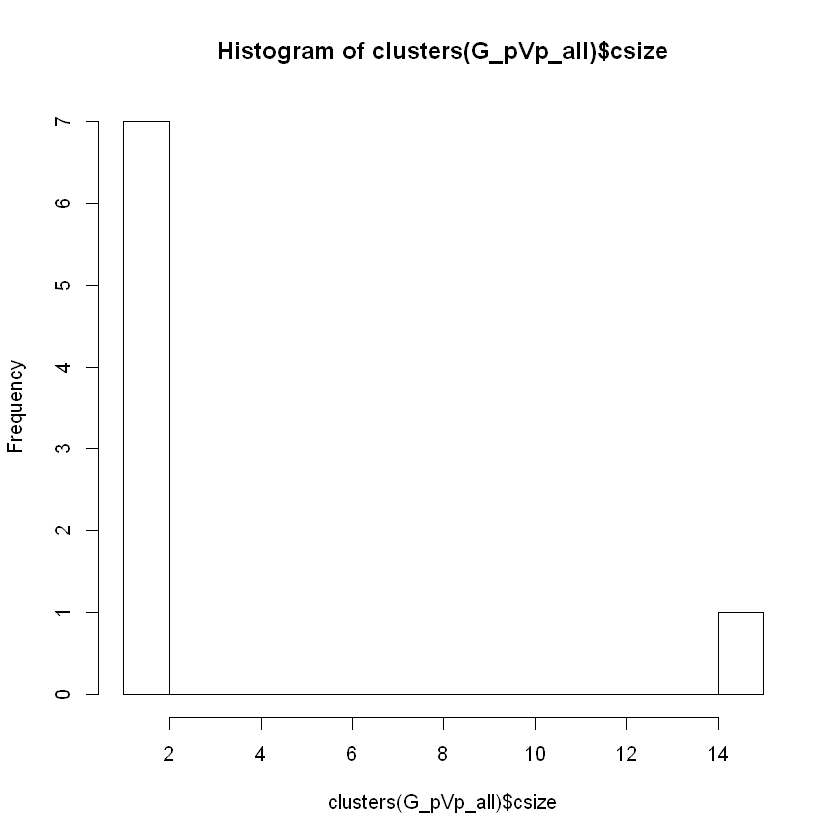

In [17]:
average.path.length(G_pVp_all, directed=TRUE, unconnected=TRUE)
path.length.hist (G_pVp_all, directed = TRUE)

eccentricity(G_pVp_all, vids = V(G_pVp_all), mode = c("all"))
eccentricity(G_pVp_all, vids = V(G_pVp_all), mode = c("in"))
eccentricity(G_pVp_all, vids = V(G_pVp_all), mode = c("out"))

diameter(G_pVp_all)

clusters(G_pVp_all)

hist(clusters(G_pVp_all)$csize,15)

In [18]:
# betweenness
betweenness(G_pVp_all, v=V(G_pVp_all), directed = TRUE, weights = NULL, nobigint = TRUE, normalized = FALSE)

# centrality
centralization.degree (G_pVp_all, mode = c("all"), loops = TRUE, normalized = TRUE) 
centralization.closeness (G_pVp_all, mode = c("all"), normalized = TRUE)
centralization.betweenness (G_pVp_all, directed = TRUE, nobigint = TRUE, normalized = TRUE)

# eigenvector centrality
evcent (G_pVp_all, directed = FALSE, scale = TRUE, weights = NULL, options = igraph.arpack.default)

Prof. Eich             Red            Blue        Teenager           Rokko 
              0              12               0               0               0 
          Misty            Swot       Major Bob        Mr. Fuji           Reina 
              0               0               0               0               0 
    Team Rocket           Erika            Koga       Gentleman        Giovanni 
              0               0               0               0               0 
        Sabrina Karate champion            Pyro         Lorelei           Bruno 
              0               0               0               0               0 
         Agathe       Siegfried 
              0               0

$res
 [1]  0 15  3  1  1  0  0  0  0  0  0  1  1  1  2  1  1  1  1  1  1  1

$centralization
[1] 0.3378685

$theoretical_max
[1] 882

$res
 [1] 0.04545455 0.12500000 0.11666667 0.11602210 0.11602210 0.04545455
 [7] 0.04545455 0.04545455 0.04545455 0.04545455 0.04545455 0.11602210
[13] 0.11602210 0.11602210 0.11666667 0.11602210 0.11602210 0.11602210
[19] 0.11602210 0.11602210 0.11602210 0.11602210

$centralization
[1] 0.06650001

$theoretical_max
[1] 10.2439

$res
 [1]  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

$centralization
[1] 0.02857143

$theoretical_max
[1] 8820

$vector
     Prof. Eich             Red            Blue        Teenager           Rokko 
   1.004081e-17    1.000000e+00    5.527379e-01    2.338959e-01    2.338959e-01 
          Misty            Swot       Major Bob        Mr. Fuji           Reina 
   1.004081e-17    1.004081e-17    1.004081e-17    1.004081e-17    1.004081e-17 
    Team Rocket           Erika            Koga       Gentleman        Giovanni 
   1.004081e-17    2.338959e-01    2.338959e-01    2.338959e-01    3.631791e-01 
        Sabrina Karate champion            Pyro         Lorelei           Bruno 
   2.338959e-01    2.338959e-01    2.338959e-01    2.338959e-01    2.338959e-01 
         Agathe       Siegfried 
   2.338959e-01    2.338959e-01 

$value
[1] 4.275406

$options
$options$bmat
[1] "I"

$options$n
[1] 22

$options$which
[1] "LA"

$options$nev
[1] 1

$options$tol
[1] 0

$options$ncv
[1] 0

$options$ldv
[1] 0

$options$ishift
[1] 1

$options$maxiter
[1] 1000

$options$nb
[1] 1

$options$mode
[1] 1

$options$start
[1] 1

$options$sigma
[1] 0

$options$sigmai
[1] 0

$options$info
[1] 0

$options$iter
[1] 1

$options$nconv
[1] 1

$options$numop
[1] 11

$options$numopb
[1] 0

$options$numreo
[1] 9

## Fighting Graph: Pokémon vs Pokémon

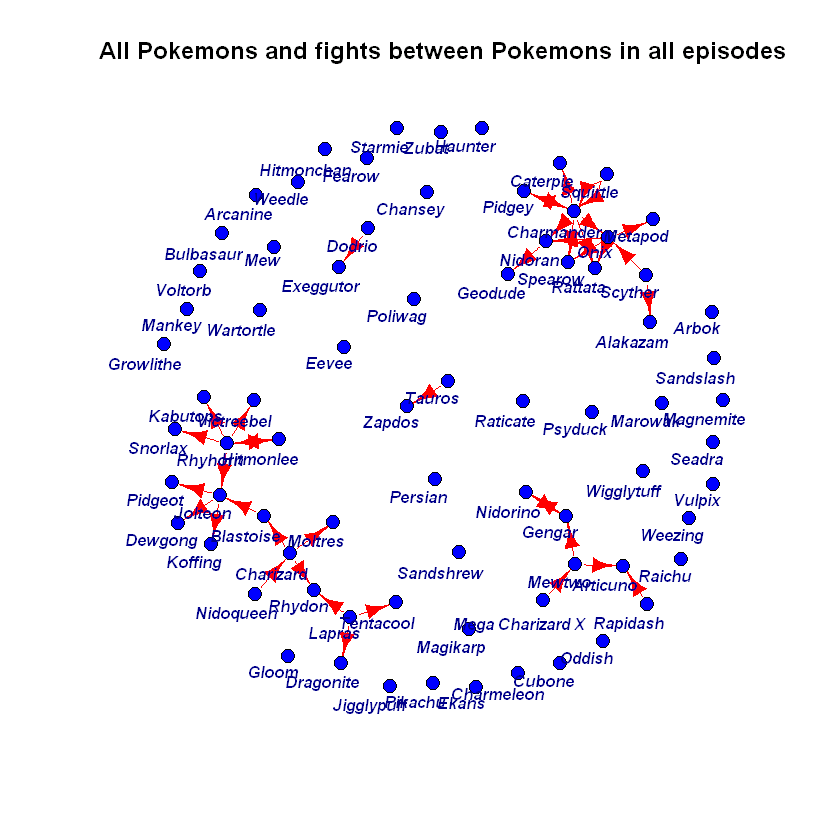

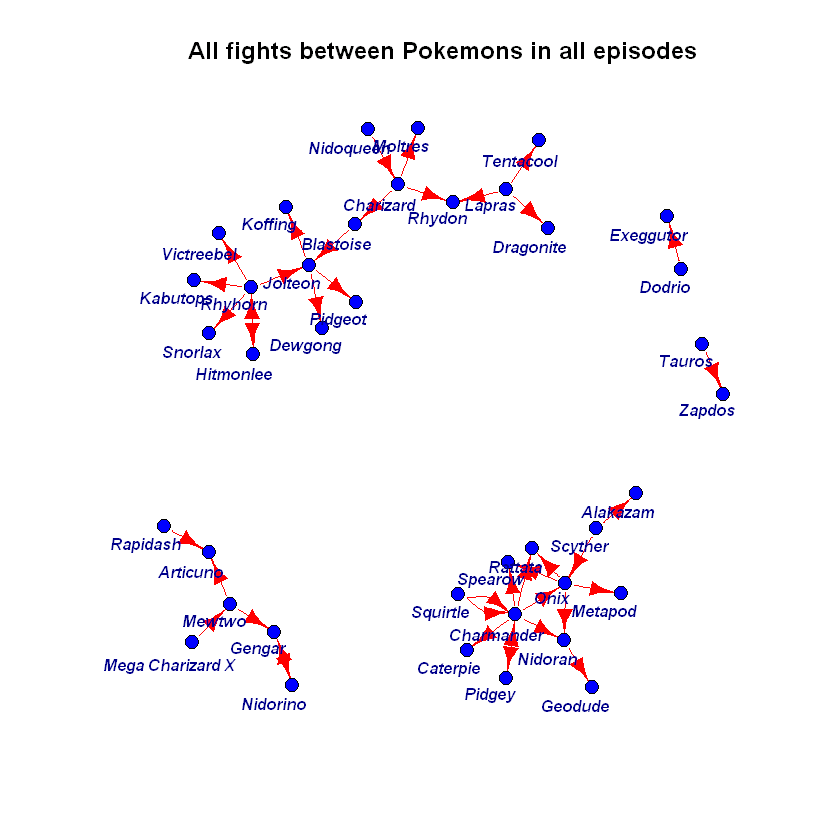

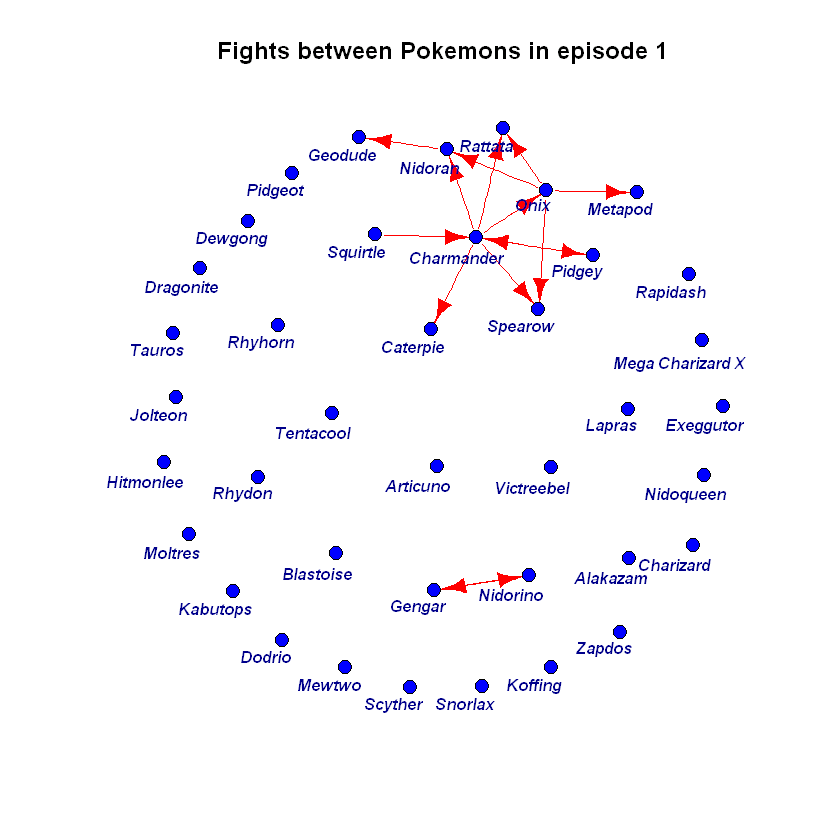

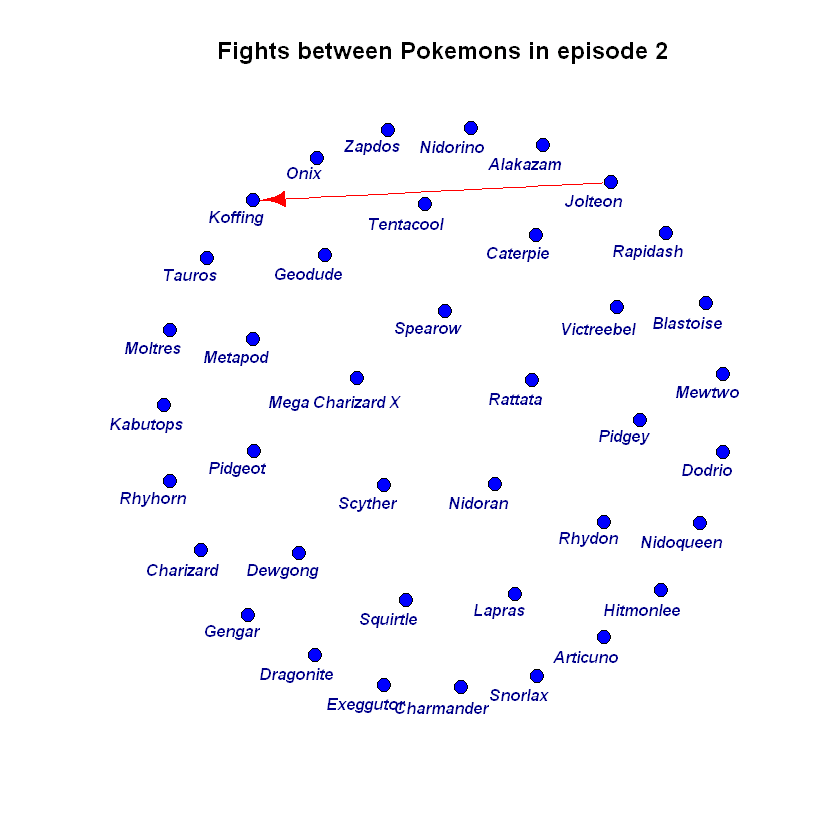

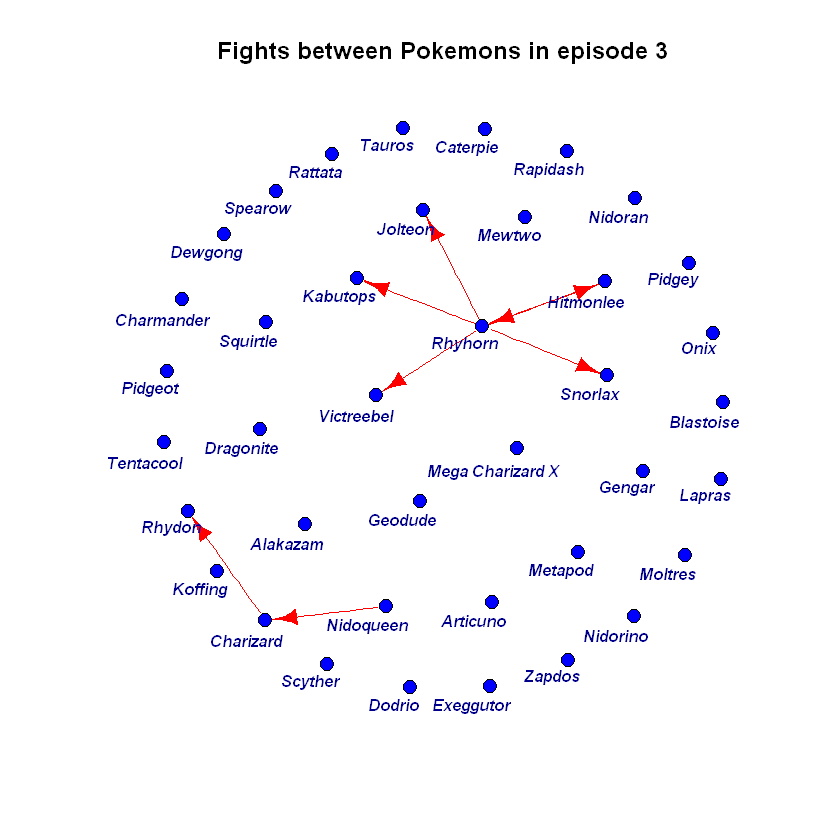

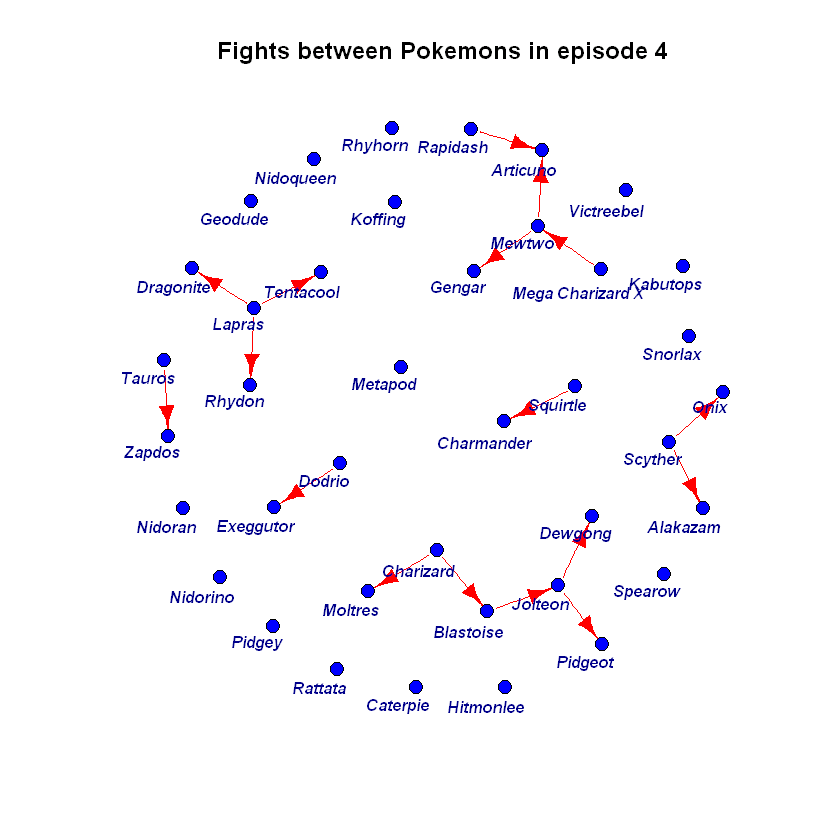

In [19]:
# create Pokémon-vs-Pokémon graphs G and adjacency matrices M

# all Pokémons
G_pokeVpoke_all_ap <- graph.data.frame(d_poke2poke, directed=TRUE, vertices=select(df_poke,PokemonEN,Type1))
G_pokeVpoke_all <- graph.data.frame(d_poke2poke, directed=TRUE, vertices=NULL)
M_pokeVpoke_all <- get.adjacency(G_pokeVpoke_all)

# Pokémons in episode 1
G_pokeVpoke_e1 <- delete.edges(G_pokeVpoke_all, E(G_pokeVpoke_all)[E(G_pokeVpoke_all)$Episode1 != 1])
M_pokeVpoke_e1 <- get.adjacency(G_pokeVpoke_e1)

# Pokémons in episode 2
G_pokeVpoke_e2 <- delete.edges(G_pokeVpoke_all, E(G_pokeVpoke_all)[E(G_pokeVpoke_all)$Episode2 != 1])
M_pokeVpoke_e2 <- get.adjacency(G_pokeVpoke_e2)

# Pokémons in episode 3
G_pokeVpoke_e3 <- delete.edges(G_pokeVpoke_all, E(G_pokeVpoke_all)[E(G_pokeVpoke_all)$Episode3 != 1])
M_pokeVpoke_e3 <- get.adjacency(G_pokeVpoke_e3)

# Pokémons in episode 4
G_pokeVpoke_e4 <- delete.edges(G_pokeVpoke_all, E(G_pokeVpoke_all)[E(G_pokeVpoke_all)$Episode4 != 1])
M_pokeVpoke_e4 <- get.adjacency(G_pokeVpoke_e4)


# plot the graphs

# all Pokémon-VS-Pokémon fights within all pokemons
plot.igraph(G_pokeVpoke_all_ap,
            main = "All Pokemons and fights between Pokemons in all episodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            #edge.label          = E(G_pokeVpoke_all)$Total,
            edge.width          = E(G_pokeVpoke_all)$Total,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 4,
            edge.label.color    = 'black'            
           )

# all Pokémon-VS-Pokémon fights with just involved pokemons
plot.igraph(G_pokeVpoke_all,
            main = "All fights between Pokemons in all episodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            #edge.label          = E(G_pokeVpoke_all)$Total,
            edge.width          = E(G_pokeVpoke_all)$Total,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 4,
            edge.label.color    = 'black'            
           )

# Episode 1: Pokémon-VS-Pokémon
plot.igraph(G_pokeVpoke_e1,
            main = "Fights between Pokemons in episode 1",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = E(G_pokeVpoke_e1)$Episode1,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 4,
            edge.label.color    = 'black'            
          )

# Episode 2: Pokémon-VS-Pokémon
plot.igraph(G_pokeVpoke_e2,
            main = "Fights between Pokemons in episode 2",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = E(G_pokeVpoke_e2)$Episode2,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 4,
            edge.label.color    = 'black'            
          )

# Episode 3: Pokémon-VS-Pokémon
plot.igraph(G_pokeVpoke_e3,
            main = "Fights between Pokemons in episode 3",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = E(G_pokeVpoke_e3)$Episode3,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 4,
            edge.label.color    = 'black'            
          )

# Episode 4: Pokémon-VS-Pokémon
plot.igraph(G_pokeVpoke_e4,
            main = "Fights between Pokemons in episode 4",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = E(G_pokeVpoke_e4)$Episode4,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 4,
            edge.label.color    = 'black'            
          )

## All Pokemon fights (all Pokemons)

IGRAPH DN-- 76 41 -- 
+ attr: name (v/c), Type1 (v/c), Episode1 (e/n), Episode2 (e/n),
| Episode3 (e/n), Episode4 (e/n), Total (e/n)
avg degree: ~ 1.078947

[1] 42

[1]  1  6 12  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 17  1  1  1  1  1  1
[26]  1  1  1  1  1  1  1  1  1  2  1  1  1  1  2  1  1

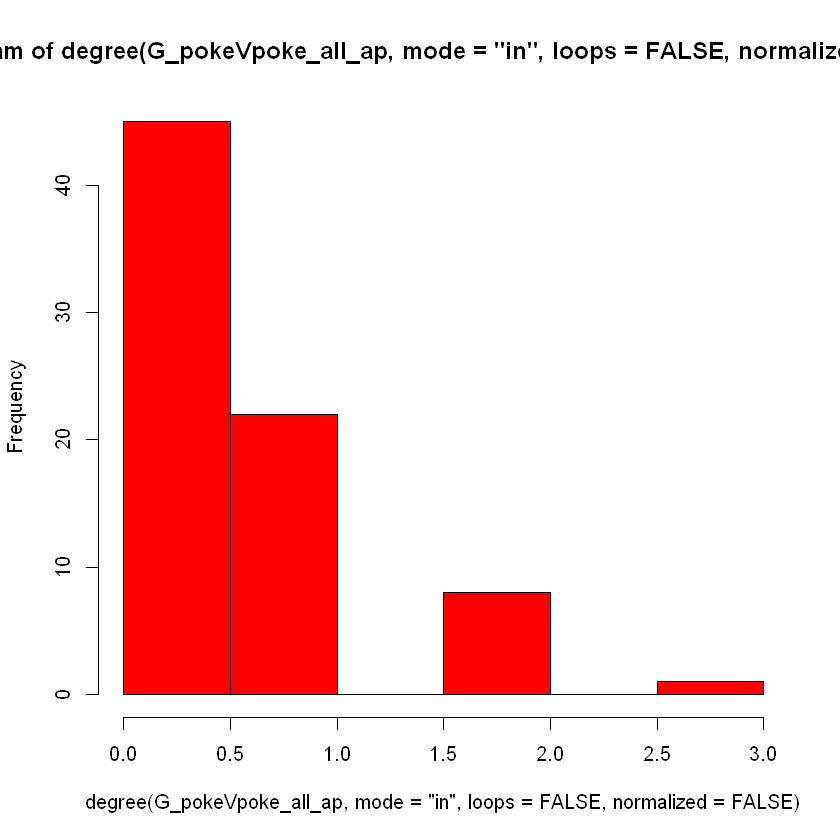

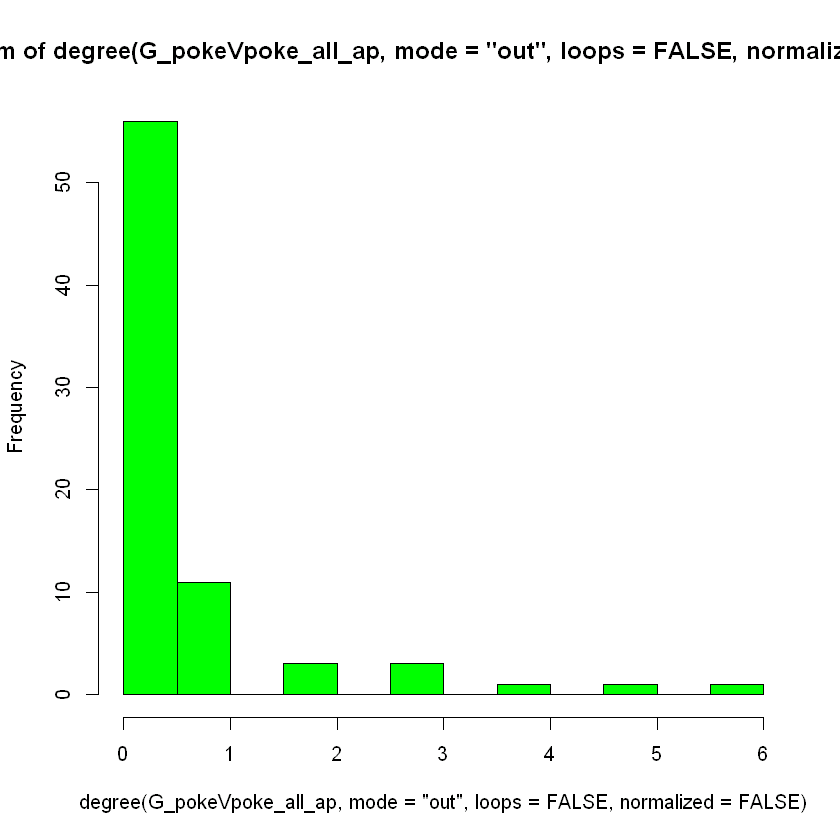

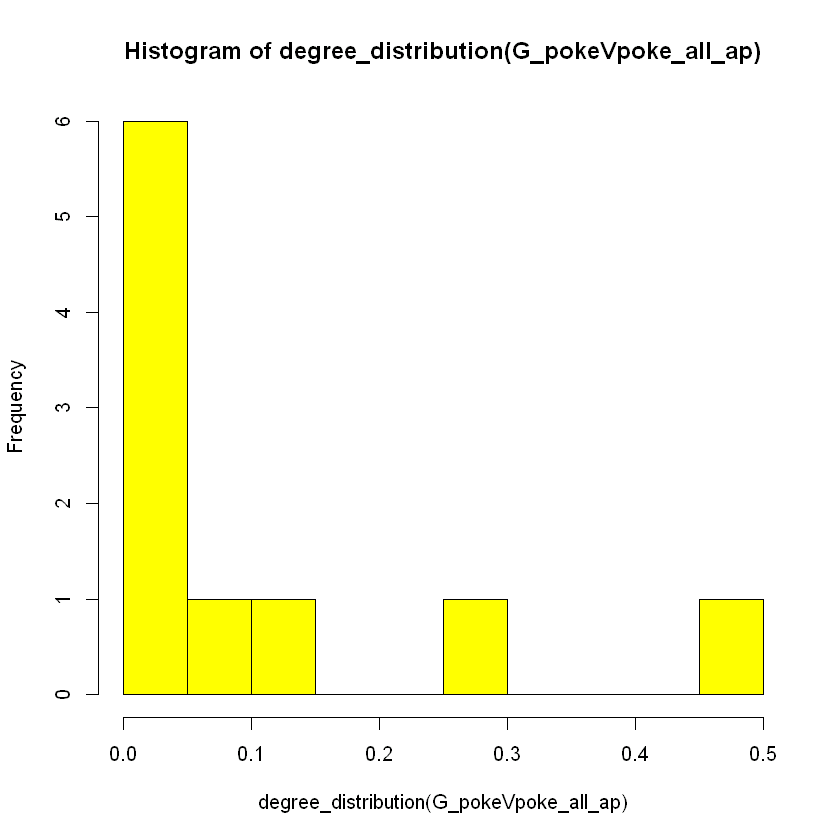

In [20]:
# fights within all pokemons
summary(G_pokeVpoke_all_ap)                                                                                           # summary of graph
cat("avg degree: ~",mean(degree(G_pokeVpoke_all_ap)))                                                                 # avg degree
clusters(G_pokeVpoke_all_ap)$no                                                                                       # number of clusters
clusters(G_pokeVpoke_all_ap)$csize                                                                                    # cluster components
d_in_ap  <- degree(G_pokeVpoke_all_ap, v = V(G_pokeVpoke_all_ap), mode = c("in"), loops = FALSE, normalized = FALSE)  # in-degree
d_out_ap <- degree(G_pokeVpoke_all_ap, v = V(G_pokeVpoke_all_ap), mode = c("out"), loops = FALSE, normalized = FALSE) # out-degree
histo_in  <- hist(degree(G_pokeVpoke_all_ap, mode = "in", loops = FALSE, normalized = FALSE), 10, col="red")          # in-degree histogram
histo_out <- hist(degree(G_pokeVpoke_all_ap, mode = "out", loops = FALSE, normalized = FALSE), 10, col="green")       # out-degree histogram
hist(degree_distribution(G_pokeVpoke_all_ap), 10, col="yellow")                                                       # degree distribution

## All Pokemon fights (only involved Pokemons)

IGRAPH DN-- 39 41 -- 
+ attr: name (v/c), Episode1 (e/n), Episode2 (e/n), Episode3 (e/n),
| Episode4 (e/n), Total (e/n)
avg degree: ~ 2.102564

[1] 5

[1]  6 12 17  2  2

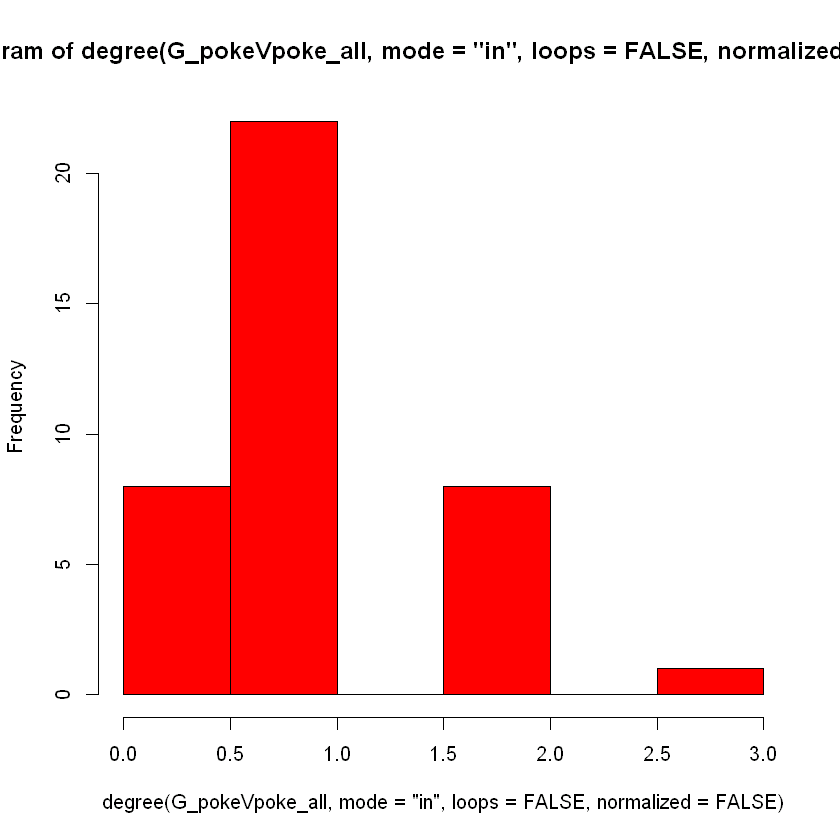

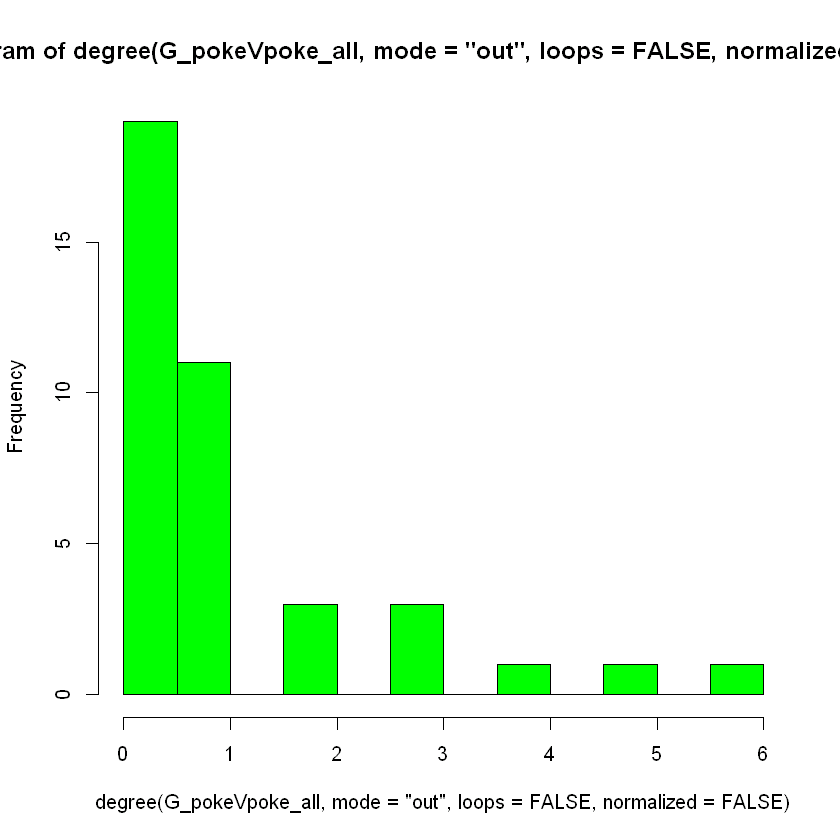

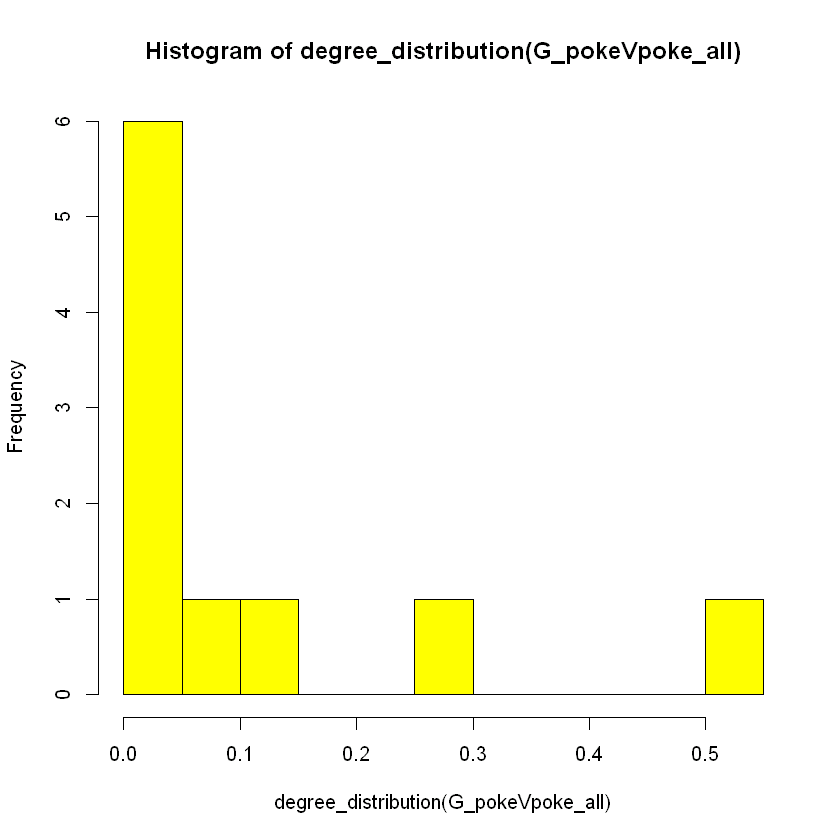

In [21]:
# fights within just involved pokemons
summary(G_pokeVpoke_all)                                                                                              # summary of graph
cat("avg degree: ~",mean(degree(G_pokeVpoke_all)))                                                                    # avg degree
clusters(G_pokeVpoke_all)$no                                                                                          # number of clusters
clusters(G_pokeVpoke_all)$csize                                                                                       # cluster components
d_in_ap  <- degree(G_pokeVpoke_all, v = V(G_pokeVpoke_all), mode = c("in"), loops = FALSE, normalized = FALSE)        # in-degree
d_out_ap <- degree(G_pokeVpoke_all, v = V(G_pokeVpoke_all), mode = c("out"), loops = FALSE, normalized = FALSE)       # out-degree
histo_in  <- hist(degree(G_pokeVpoke_all, mode = "in", loops = FALSE, normalized = FALSE), 10, col="red")             # in-degree histogram
histo_out <- hist(degree(G_pokeVpoke_all, mode = "out", loops = FALSE, normalized = FALSE), 10, col="green")          # out-degree histogram
hist(degree_distribution(G_pokeVpoke_all), 10, col="yellow")                                                          # degree distribution

## Pokemon fights in episode 1

IGRAPH DN-- 39 15 -- 
+ attr: name (v/c), Episode1 (e/n), Episode2 (e/n), Episode3 (e/n),
| Episode4 (e/n), Total (e/n)
avg degree: ~ 0.7692308

[1] 29

[1]  2 10  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[26]  1  1  1  1

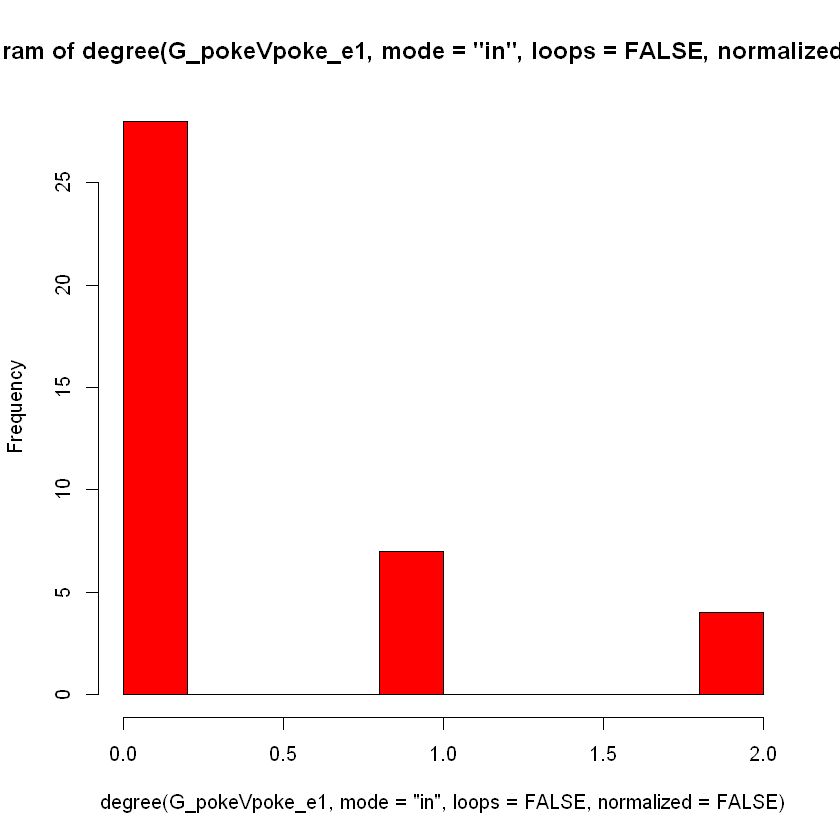

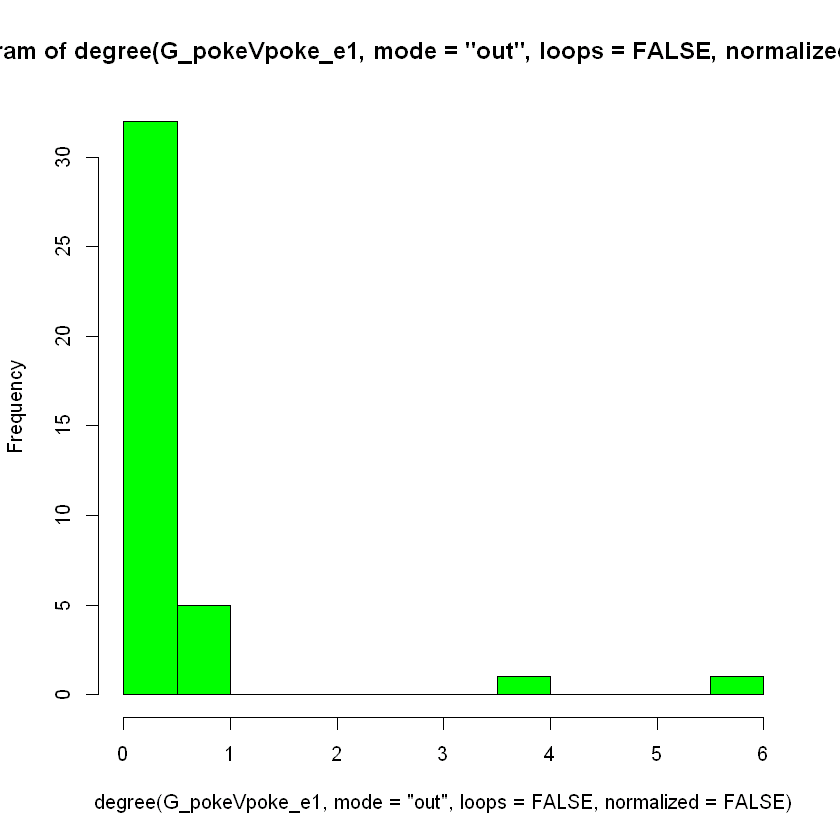

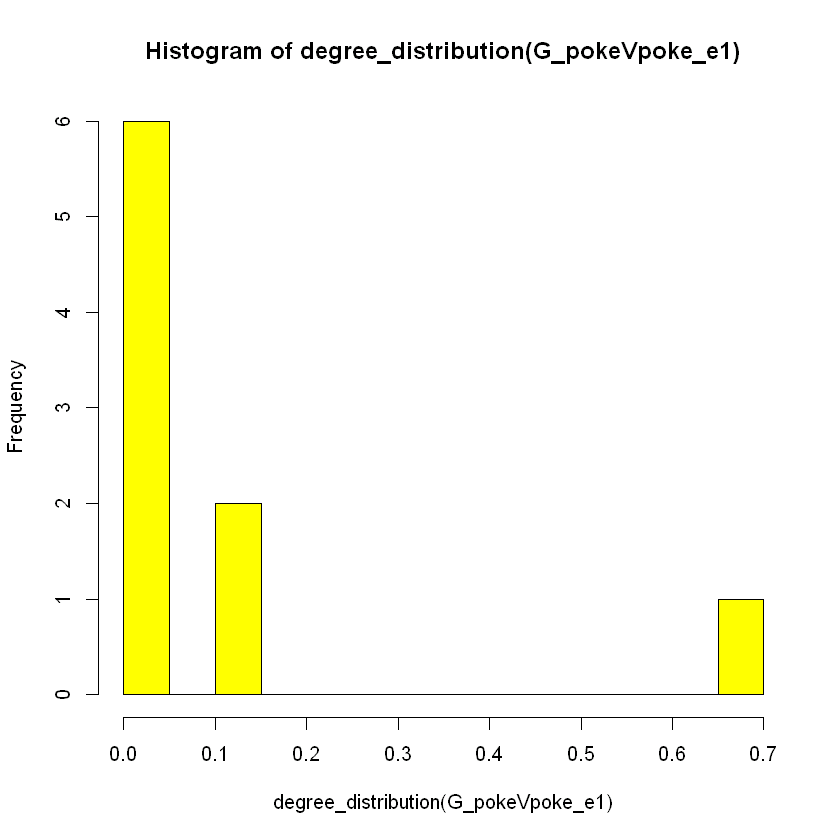

In [22]:
# fights episode 1
summary(G_pokeVpoke_e1)                                                                                               # summary of graph
cat("avg degree: ~",mean(degree(G_pokeVpoke_e1)))                                                                     # avg degree
clusters(G_pokeVpoke_e1)$no                                                                                           # number of clusters
clusters(G_pokeVpoke_e1)$csize                                                                                        # cluster components
d_in_ap  <- degree(G_pokeVpoke_e1, v = V(G_pokeVpoke_e1), mode = c("in"), loops = FALSE, normalized = FALSE)          # in-degree
d_out_ap <- degree(G_pokeVpoke_e1, v = V(G_pokeVpoke_e1), mode = c("out"), loops = FALSE, normalized = FALSE)         # out-degree
histo_in  <- hist(degree(G_pokeVpoke_e1, mode = "in", loops = FALSE, normalized = FALSE), 10, col="red")              # in-degree histogram
histo_out <- hist(degree(G_pokeVpoke_e1, mode = "out", loops = FALSE, normalized = FALSE), 10, col="green")           # out-degree histogram
hist(degree_distribution(G_pokeVpoke_e1), 10, col="yellow")                                                           # degree distribution

## Pokemon fights in episode 2

IGRAPH DN-- 39 1 -- 
+ attr: name (v/c), Episode1 (e/n), Episode2 (e/n), Episode3 (e/n),
| Episode4 (e/n), Total (e/n)
avg degree: ~ 0.05128205

[1] 38

[1] 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

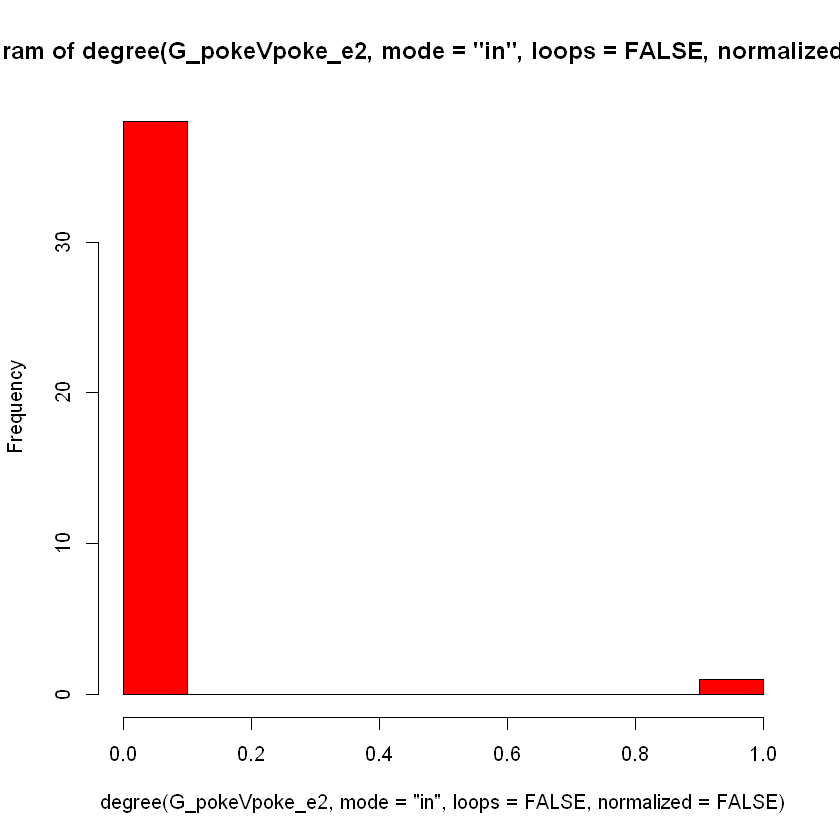

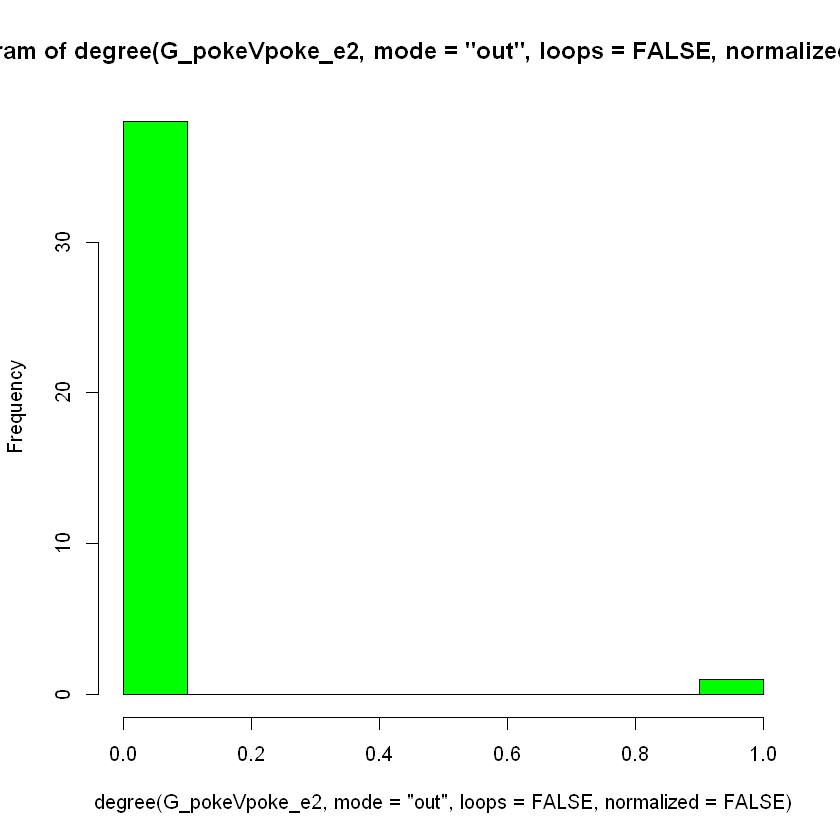

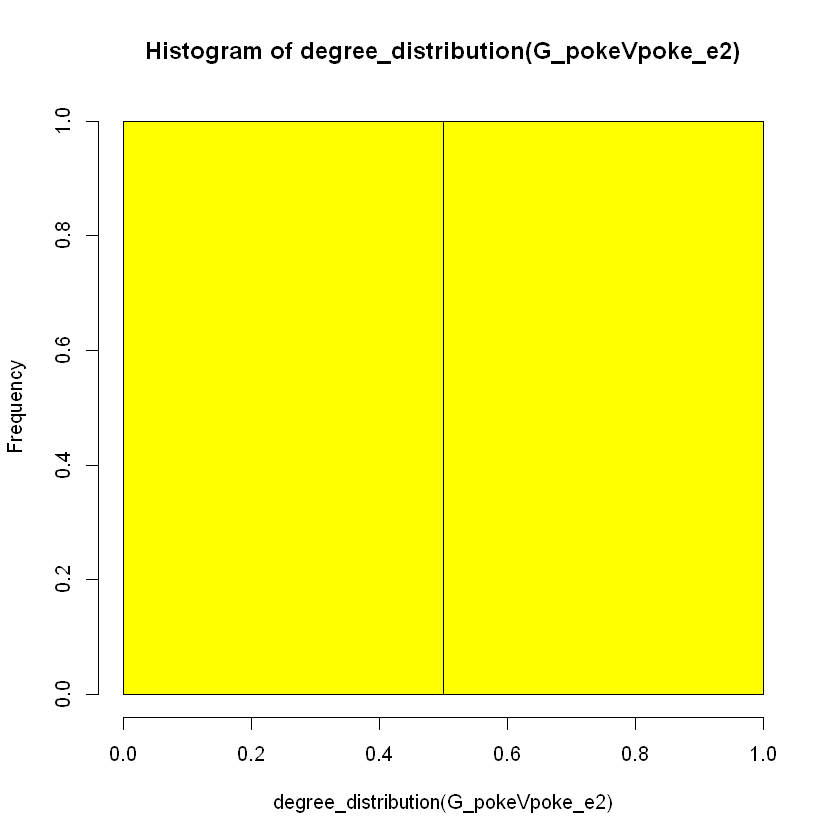

In [23]:
# fights episode 2
summary(G_pokeVpoke_e2)                                                                                               # summary of graph
cat("avg degree: ~",mean(degree(G_pokeVpoke_e2)))                                                                     # avg degree
clusters(G_pokeVpoke_e2)$no                                                                                           # number of clusters
clusters(G_pokeVpoke_e2)$csize                                                                                        # cluster components
d_in_ap  <- degree(G_pokeVpoke_e2, v = V(G_pokeVpoke_e2), mode = c("in"), loops = FALSE, normalized = FALSE)          # in-degree
d_out_ap <- degree(G_pokeVpoke_e2, v = V(G_pokeVpoke_e2), mode = c("out"), loops = FALSE, normalized = FALSE)         # out-degree
histo_in  <- hist(degree(G_pokeVpoke_e2, mode = "in", loops = FALSE, normalized = FALSE), 10, col="red")              # in-degree histogram
histo_out <- hist(degree(G_pokeVpoke_e2, mode = "out", loops = FALSE, normalized = FALSE), 10, col="green")           # out-degree histogram
hist(degree_distribution(G_pokeVpoke_e2),, 10, col="yellow")                                                          # degree distribution

## Pokemon fights in episode 3

IGRAPH DN-- 39 8 -- 
+ attr: name (v/c), Episode1 (e/n), Episode2 (e/n), Episode3 (e/n),
| Episode4 (e/n), Total (e/n)
avg degree: ~ 0.4102564

[1] 32

[1] 1 1 1 1 1 1 1 6 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

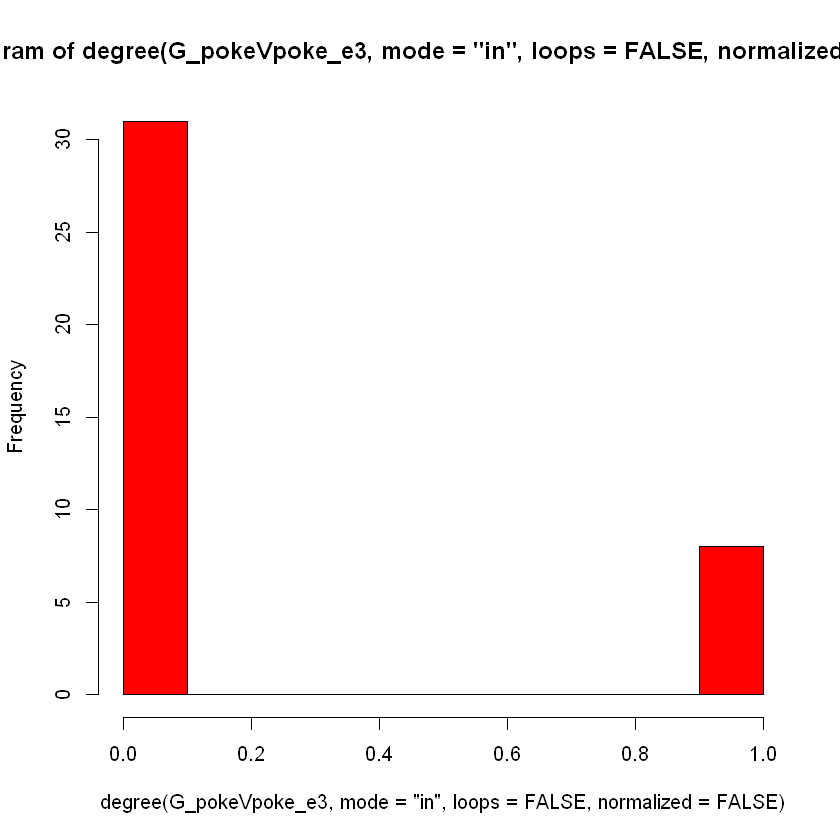

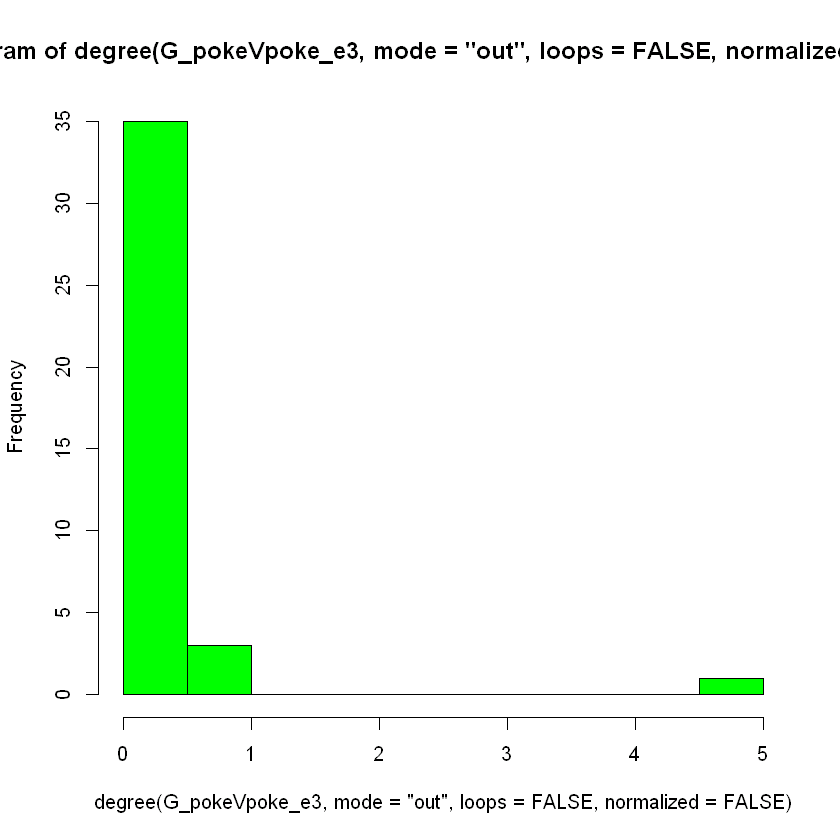

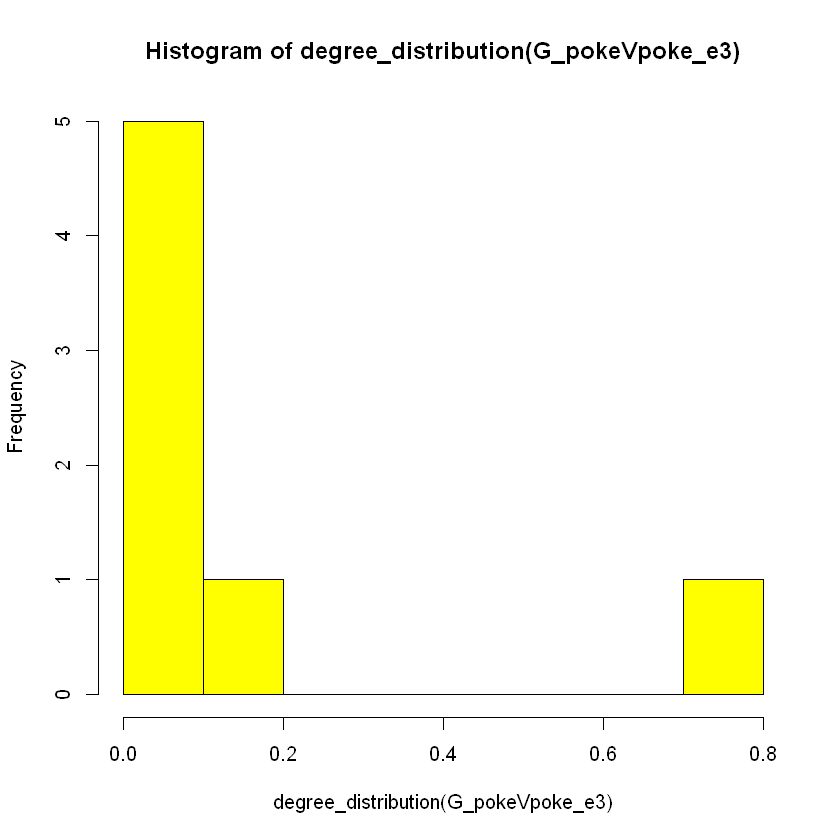

In [24]:
# fights episode 3
summary(G_pokeVpoke_e3)                                                                                               # summary of graph
cat("avg degree: ~",mean(degree(G_pokeVpoke_e3)))                                                                     # avg degree
clusters(G_pokeVpoke_e3)$no                                                                                           # number of clusters
clusters(G_pokeVpoke_e3)$csize                                                                                        # cluster components
d_in_ap  <- degree(G_pokeVpoke_e3, v = V(G_pokeVpoke_e3), mode = c("in"), loops = FALSE, normalized = FALSE)          # in-degree
d_out_ap <- degree(G_pokeVpoke_e3, v = V(G_pokeVpoke_e3), mode = c("out"), loops = FALSE, normalized = FALSE)         # out-degree
histo_in  <- hist(degree(G_pokeVpoke_e3, mode = "in", loops = FALSE, normalized = FALSE), 10, col="red")              # in-degree histogram
histo_out <- hist(degree(G_pokeVpoke_e3, mode = "out", loops = FALSE, normalized = FALSE), 10, col="green")           # out-degree histogram
hist(degree_distribution(G_pokeVpoke_e3), 10, col="yellow")                                                           # degree distribution

IGRAPH DN-- 39 17 -- 
+ attr: name (v/c), Episode1 (e/n), Episode2 (e/n), Episode3 (e/n),
| Episode4 (e/n), Total (e/n)
avg degree: ~ 0.8717949

[1] 22

[1] 1 5 2 1 1 3 6 4 1 1 1 2 2 1 1 1 1 1 1 1 1 1

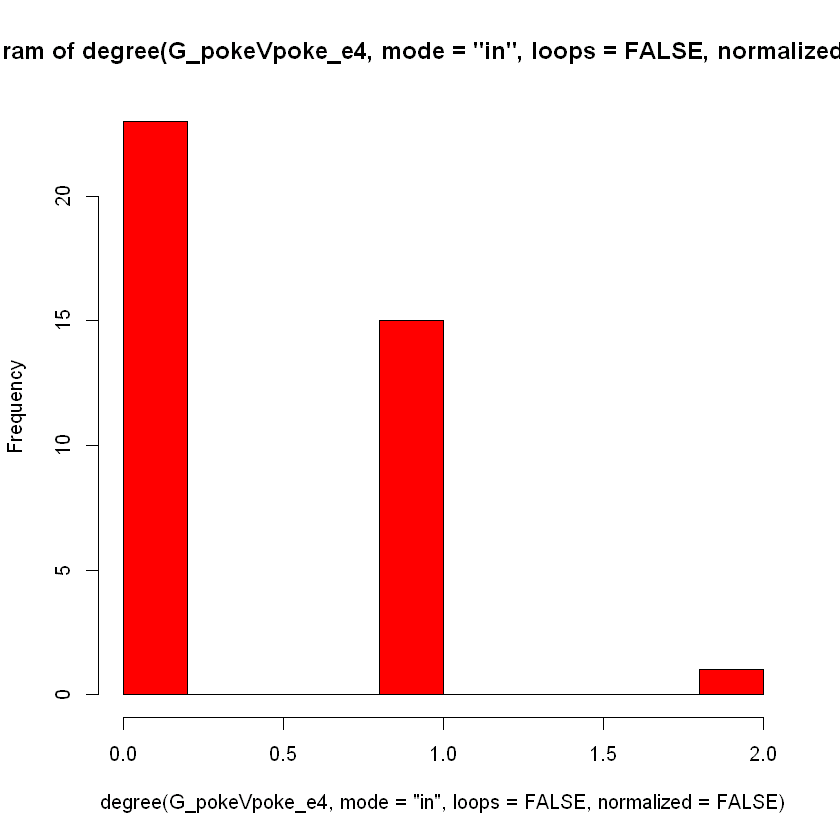

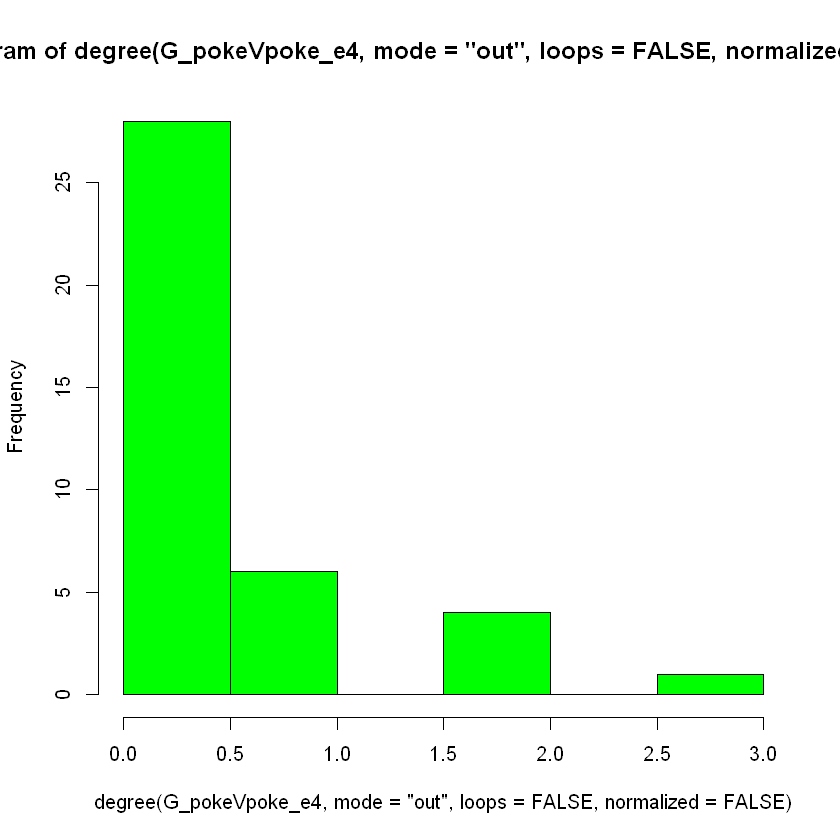

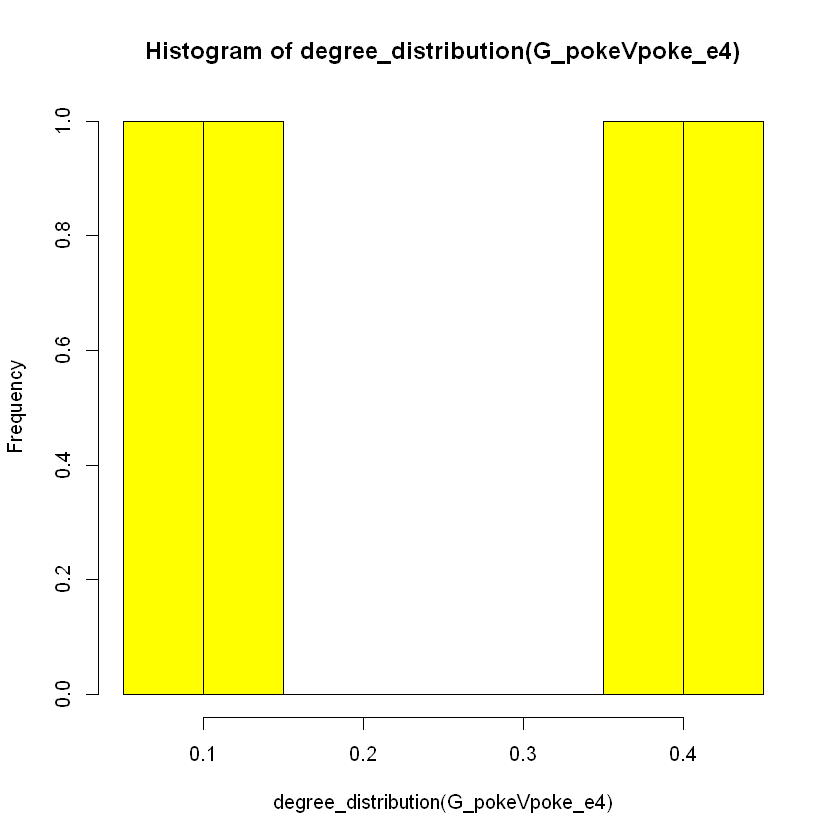

In [25]:
# fights episode 4
summary(G_pokeVpoke_e4)                                                                                               # summary of graph
cat("avg degree: ~",mean(degree(G_pokeVpoke_e4)))                                                                     # avg degree
clusters(G_pokeVpoke_e4)$no                                                                                           # number of clusters
clusters(G_pokeVpoke_e4)$csize                                                                                        # cluster components
d_in_ap  <- degree(G_pokeVpoke_e4, v = V(G_pokeVpoke_e4), mode = c("in"), loops = FALSE, normalized = FALSE)          # in-degree
d_out_ap <- degree(G_pokeVpoke_e4, v = V(G_pokeVpoke_e4), mode = c("out"), loops = FALSE, normalized = FALSE)         # out-degree
histo_in  <- hist(degree(G_pokeVpoke_e4, mode = "in", loops = FALSE, normalized = FALSE), 10, col="red")              # in-degree histogram
histo_out <- hist(degree(G_pokeVpoke_e4, mode = "out", loops = FALSE, normalized = FALSE), 10, col="green")           # out-degree histogram
hist(degree_distribution(G_pokeVpoke_e4), 10, col="yellow")                                                           # degree distribution

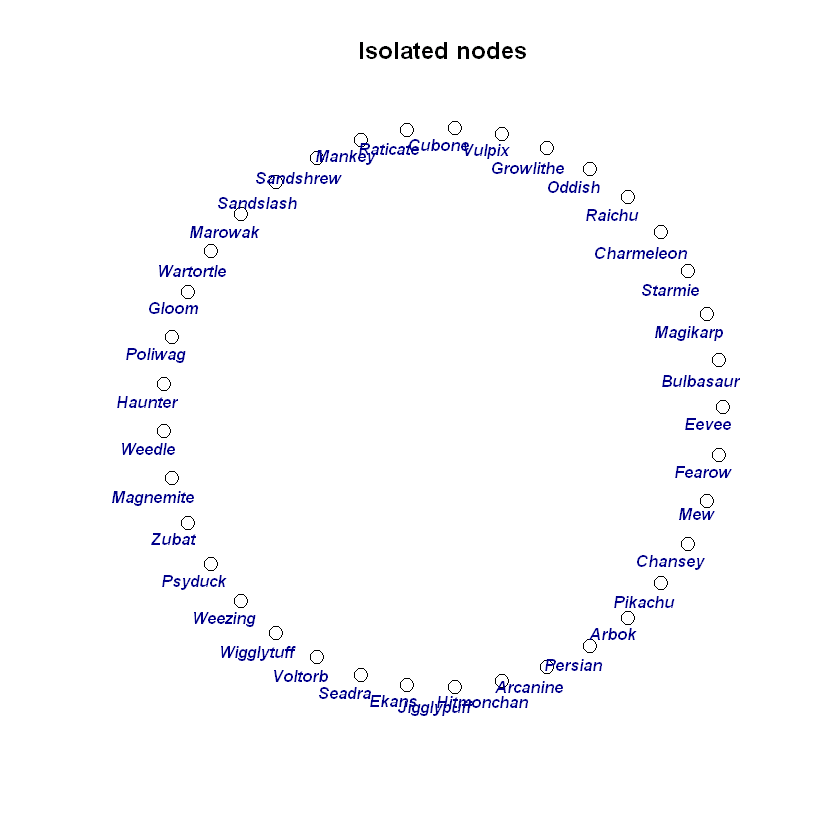

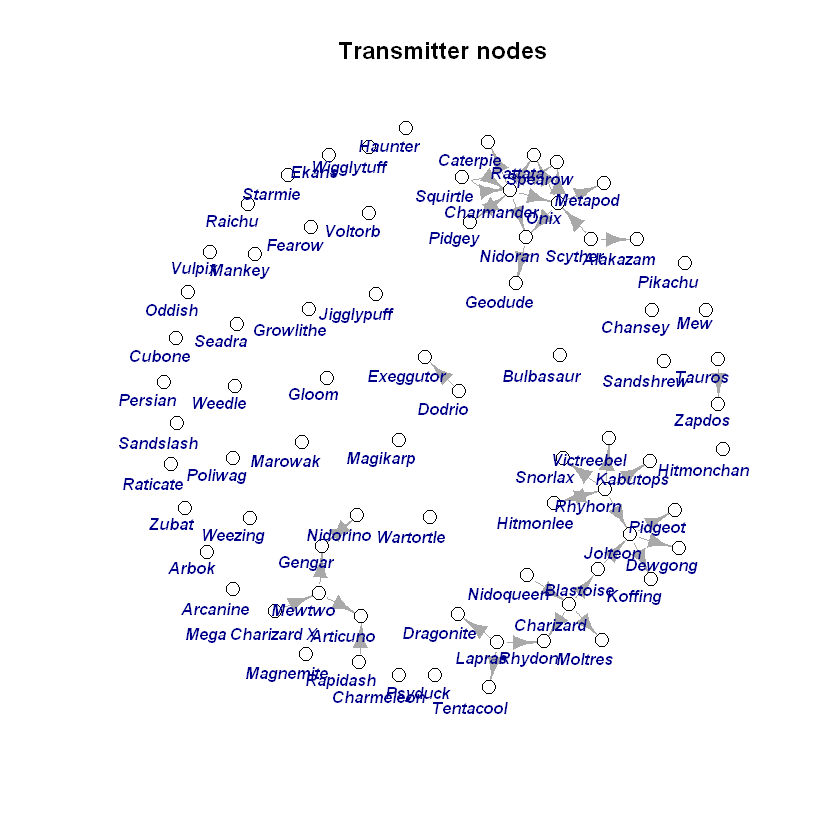

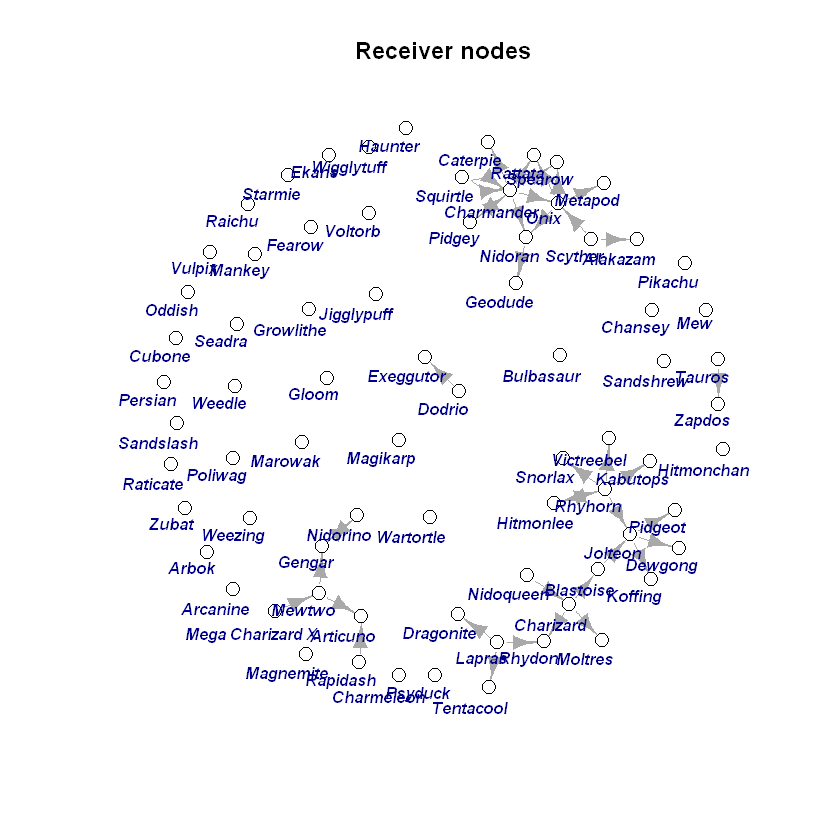

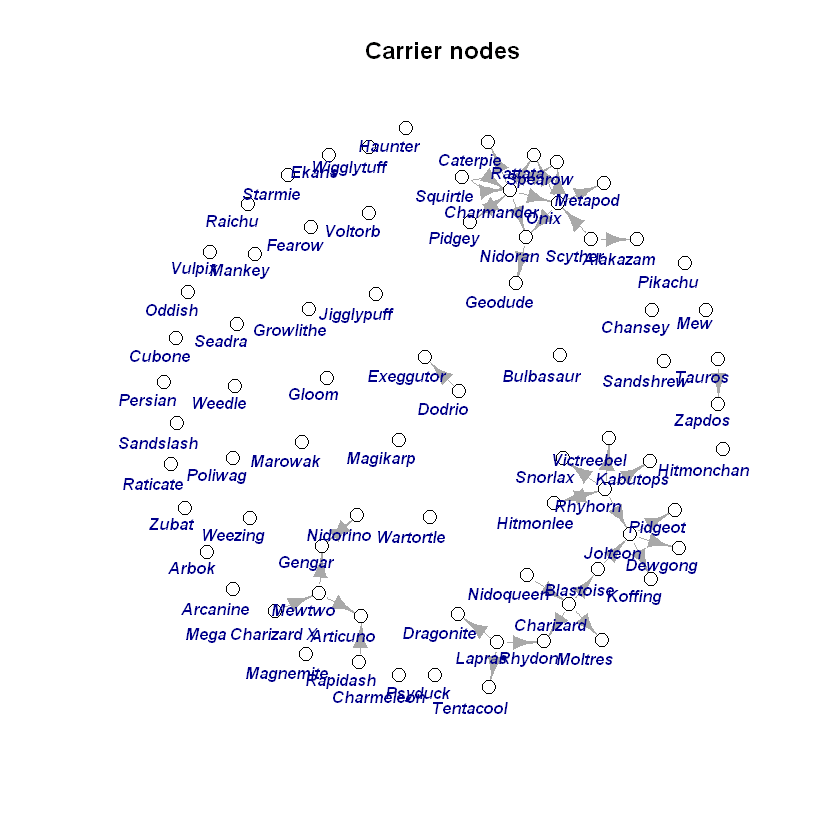

In [26]:
# node types
G_poke_iso <- delete.vertices(G_pokeVpoke_all_ap, which(!(degree(G_pokeVpoke_all_ap, mode = "all") == 0)))
G_poke_tra <- delete.vertices(G_pokeVpoke_all_ap, which(!((degree(G_pokeVpoke_all_ap, mode = "in") == 0) && (degree(G_pokeVpoke_all_ap, mode = "out") > 0))))
G_poke_rec <- delete.vertices(G_pokeVpoke_all_ap, which(!((degree(G_pokeVpoke_all_ap, mode = "in") > 0) && (degree(G_pokeVpoke_all_ap, mode = "out") == 0))))
G_poke_car <- delete.vertices(G_pokeVpoke_all_ap, which(!((degree(G_pokeVpoke_all_ap, mode = "in") > 0) && (degree(G_pokeVpoke_all_ap, mode = "out") > 0))))

# plot the graphs
plot.igraph(G_poke_iso,
            main = "Isolated nodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'white',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,       
           )

plot.igraph(G_poke_tra,
            main = "Transmitter nodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'white',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,       
           )

plot.igraph(G_poke_rec,
            main = "Receiver nodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'white',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,       
           )

plot.igraph(G_poke_car,
            main = "Carrier nodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'white',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,       
           )

In [27]:
average.path.length(G_pokeVpoke_all_ap, directed=TRUE, unconnected=TRUE)
path.length.hist (G_pokeVpoke_all_ap, directed = TRUE)

eccentricity(G_pokeVpoke_all_ap, vids = V(G_pokeVpoke_all_ap), mode = c("all"))
eccentricity(G_pokeVpoke_all_ap, vids = V(G_pokeVpoke_all_ap), mode = c("in"))
eccentricity(G_pokeVokep_all_ap, vids = V(G_pokeVpoke_all_ap), mode = c("out"))

diameter(G_pokeVokep_all_ap)

clusters(G_pokeVokep_all_ap)

hist(clusters(G_pokeVokep_all_ap)$csize,15)

[1] 1.769231

$res
[1] 40 35 13  3

$unconnected
[1] 5609

Eevee         Nidorino           Gengar       Charmander 
               0                4                3                3 
        Squirtle        Bulbasaur         Caterpie           Pidgey 
               4                0                4                4 
         Rattata          Spearow          Nidoran          Metapod 
               3                3                3                3 
         Geodude             Onix         Magikarp          Starmie 
               4                2                0                0 
      Charmeleon           Raichu           Oddish        Growlithe 
               0                0                0                0 
          Vulpix           Cubone         Raticate           Mankey 
               0                0                0                0 
       Sandshrew        Sandslash          Marowak        Wartortle 
               0                0                0                0 
         Koffing          Jolteon            Gloom        Charizard 
               6                5                0                4 
          Lapras          Poliwag          Haunter       Victreebel 
               6                0                0                7 
        Kabutops          Snorlax           Weedle        Magnemite 
               7                7                0                0 
           Zubat          Psyduck          Weezing       Wigglytuff 
               0                0                0                0 
         Voltorb           Seadra            Ekans       Jigglypuff 
               0                0                0                0 
       Nidoqueen          Rhyhorn           Rhydon         Alakazam 
               5                6                5                4 
      Hitmonchan        Hitmonlee         Arcanine          Dewgong 
               0                7                0                6 
         Scyther           Dodrio        Dragonite          Pidgeot 
               3                1                7                6 
       Blastoise        Exeggutor          Persian            Arbok 
               4                1                0                0 
       Tentacool          Pikachu         Articuno          Chansey 
               7                0                3                0 
          Zapdos          Moltres           Mewtwo              Mew 
               1                5                2                0 
Mega Charizard X         Rapidash           Tauros           Fearow 
               3                4                1                0

Eevee         Nidorino           Gengar       Charmander 
               0                3                2                1 
        Squirtle        Bulbasaur         Caterpie           Pidgey 
               0                0                2                2 
         Rattata          Spearow          Nidoran          Metapod 
               2                2                2                3 
         Geodude             Onix         Magikarp          Starmie 
               3                2                0                0 
      Charmeleon           Raichu           Oddish        Growlithe 
               0                0                0                0 
          Vulpix           Cubone         Raticate           Mankey 
               0                0                0                0 
       Sandshrew        Sandslash          Marowak        Wartortle 
               0                0                0                0 
         Koffing          Jolteon            Gloom        Charizard 
               4                3                0                1 
          Lapras          Poliwag          Haunter       Victreebel 
               0                0                0                2 
        Kabutops          Snorlax           Weedle        Magnemite 
               2                2                0                0 
           Zubat          Psyduck          Weezing       Wigglytuff 
               0                0                0                0 
         Voltorb           Seadra            Ekans       Jigglypuff 
               0                0                0                0 
       Nidoqueen          Rhyhorn           Rhydon         Alakazam 
               0                1                2                1 
      Hitmonchan        Hitmonlee         Arcanine          Dewgong 
               0                1                0                4 
         Scyther           Dodrio        Dragonite          Pidgeot 
               0                0                1                4 
       Blastoise        Exeggutor          Persian            Arbok 
               2                1                0                0 
       Tentacool          Pikachu         Articuno          Chansey 
               1                0                2                0 
          Zapdos          Moltres           Mewtwo              Mew 
               1                2                1                0 
Mega Charizard X         Rapidash           Tauros           Fearow 
               0                0                0                0

ERROR: Error in match(x, table, nomatch = 0L): Objekt 'G_pokeVokep_all_ap' nicht gefunden


ERROR: Error in match(x, table, nomatch = 0L): Objekt 'G_pokeVokep_all_ap' nicht gefunden


ERROR: Error in match(x, table, nomatch = 0L): Objekt 'G_pokeVokep_all_ap' nicht gefunden


ERROR: Error in match(x, table, nomatch = 0L): Objekt 'G_pokeVokep_all_ap' nicht gefunden


[1] 1.769231

$res
[1] 40 35 13  3

$unconnected
[1] 1391

Nidorino           Gengar       Charmander         Squirtle 
               4                3                3                4 
          Pidgey          Nidoran             Onix          Jolteon 
               4                3                2                5 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               4                6                5                6 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               7                3                1                4 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               2                3                4                1 
        Caterpie          Rattata          Spearow          Geodude 
               4                3                3                4 
         Metapod          Pidgeot          Dewgong          Koffing 
               3                6                6                6 
         Moltres           Rhydon        Tentacool        Dragonite 
               5                5                7                7 
         Snorlax         Kabutops       Victreebel         Alakazam 
               7                7                7                4 
       Exeggutor         Articuno           Zapdos 
               1                3                1

Nidorino           Gengar       Charmander         Squirtle 
               3                2                1                0 
          Pidgey          Nidoran             Onix          Jolteon 
               2                2                2                3 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               1                0                0                1 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               1                0                0                2 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               1                0                0                0 
        Caterpie          Rattata          Spearow          Geodude 
               2                2                2                3 
         Metapod          Pidgeot          Dewgong          Koffing 
               3                4                4                4 
         Moltres           Rhydon        Tentacool        Dragonite 
               2                2                1                1 
         Snorlax         Kabutops       Victreebel         Alakazam 
               2                2                2                1 
       Exeggutor         Articuno           Zapdos 
               1                2                1

Nidorino           Gengar       Charmander         Squirtle 
               1                1                2                3 
          Pidgey          Nidoran             Onix          Jolteon 
               3                1                2                1 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               3                1                4                2 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               3                3                1                2 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               2                3                1                1 
        Caterpie          Rattata          Spearow          Geodude 
               0                0                0                0 
         Metapod          Pidgeot          Dewgong          Koffing 
               0                0                0                0 
         Moltres           Rhydon        Tentacool        Dragonite 
               0                0                0                0 
         Snorlax         Kabutops       Victreebel         Alakazam 
               0                0                0                0 
       Exeggutor         Articuno           Zapdos 
               0                0                0

[1] 4

$membership
        Nidorino           Gengar       Charmander         Squirtle 
               1                1                2                2 
          Pidgey          Nidoran             Onix          Jolteon 
               2                2                2                3 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               3                3                3                3 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               3                2                4                3 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               1                1                1                5 
        Caterpie          Rattata          Spearow          Geodude 
               2                2                2                2 
         Metapod          Pidgeot          Dewgong          Koffing 
               2                3                3                3 
         Moltres           Rhydon        Tentacool        Dragonite 
               3                3                3                3 
         Snorlax         Kabutops       Victreebel         Alakazam 
               3                3                3                2 
       Exeggutor         Articuno           Zapdos 
               4                1                5 

$csize
[1]  6 12 17  2  2

$no
[1] 5

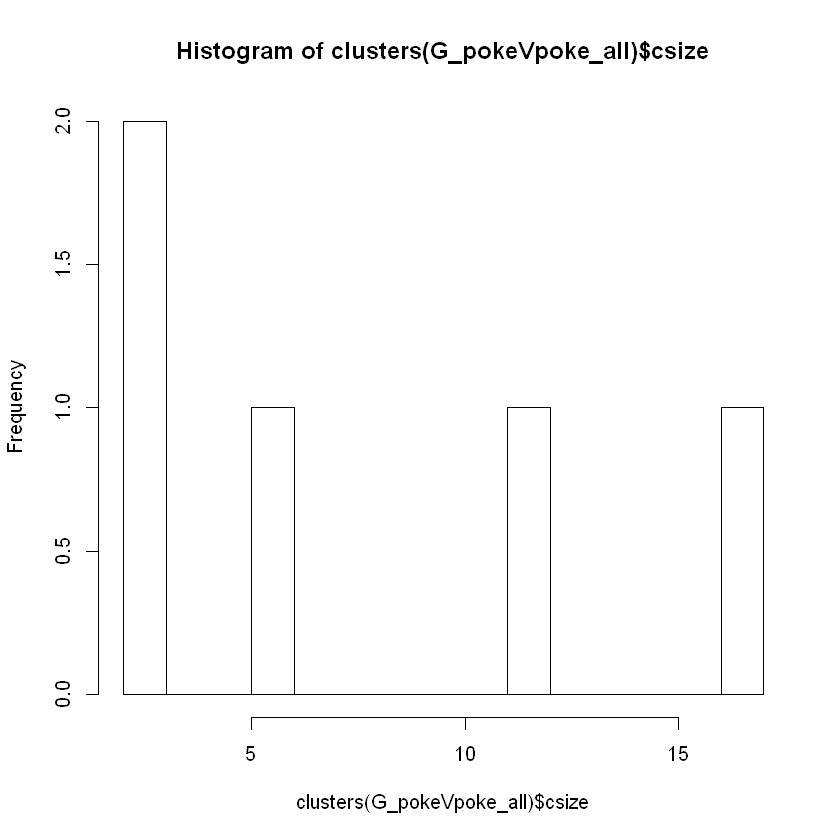

In [28]:
average.path.length(G_pokeVpoke_all, directed=TRUE, unconnected=TRUE)
path.length.hist (G_pokeVpoke_all, directed = TRUE)

eccentricity(G_pokeVpoke_all, vids = V(G_pokeVpoke_all), mode = c("all"))
eccentricity(G_pokeVpoke_all, vids = V(G_pokeVpoke_all), mode = c("in"))
eccentricity(G_pokeVpoke_all, vids = V(G_pokeVpoke_all), mode = c("out"))

diameter(G_pokeVpoke_all)

clusters(G_pokeVpoke_all)

hist(clusters(G_pokeVpoke_all)$csize,15)

[1] 1.666667

$res
[1] 15 14  4

$unconnected
[1] 1449

Nidorino           Gengar       Charmander         Squirtle 
               1                1                2                3 
          Pidgey          Nidoran             Onix          Jolteon 
               3                2                2                0 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               0                0                0                0 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               0                0                0                0 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               0                0                0                0 
        Caterpie          Rattata          Spearow          Geodude 
               3                3                3                3 
         Metapod          Pidgeot          Dewgong          Koffing 
               3                0                0                0 
         Moltres           Rhydon        Tentacool        Dragonite 
               0                0                0                0 
         Snorlax         Kabutops       Victreebel         Alakazam 
               0                0                0                0 
       Exeggutor         Articuno           Zapdos 
               0                0                0

Nidorino           Gengar       Charmander         Squirtle 
               1                1                1                0 
          Pidgey          Nidoran             Onix          Jolteon 
               2                2                2                0 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               0                0                0                0 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               0                0                0                0 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               0                0                0                0 
        Caterpie          Rattata          Spearow          Geodude 
               2                2                2                3 
         Metapod          Pidgeot          Dewgong          Koffing 
               3                0                0                0 
         Moltres           Rhydon        Tentacool        Dragonite 
               0                0                0                0 
         Snorlax         Kabutops       Victreebel         Alakazam 
               0                0                0                0 
       Exeggutor         Articuno           Zapdos 
               0                0                0

Nidorino           Gengar       Charmander         Squirtle 
               1                1                2                3 
          Pidgey          Nidoran             Onix          Jolteon 
               3                1                2                0 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               0                0                0                0 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               0                0                0                0 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               0                0                0                0 
        Caterpie          Rattata          Spearow          Geodude 
               0                0                0                0 
         Metapod          Pidgeot          Dewgong          Koffing 
               0                0                0                0 
         Moltres           Rhydon        Tentacool        Dragonite 
               0                0                0                0 
         Snorlax         Kabutops       Victreebel         Alakazam 
               0                0                0                0 
       Exeggutor         Articuno           Zapdos 
               0                0                0

[1] 3

$membership
        Nidorino           Gengar       Charmander         Squirtle 
               1                1                2                2 
          Pidgey          Nidoran             Onix          Jolteon 
               2                2                2                3 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               4                5                6                7 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               8                9               10               11 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
              12               13               14               15 
        Caterpie          Rattata          Spearow          Geodude 
               2                2                2                2 
         Metapod          Pidgeot          Dewgong          Koffing 
               2               16               17               18 
         Moltres           Rhydon        Tentacool        Dragonite 
              19               20               21               22 
         Snorlax         Kabutops       Victreebel         Alakazam 
              23               24               25               26 
       Exeggutor         Articuno           Zapdos 
              27               28               29 

$csize
 [1]  2 10  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[26]  1  1  1  1

$no
[1] 29

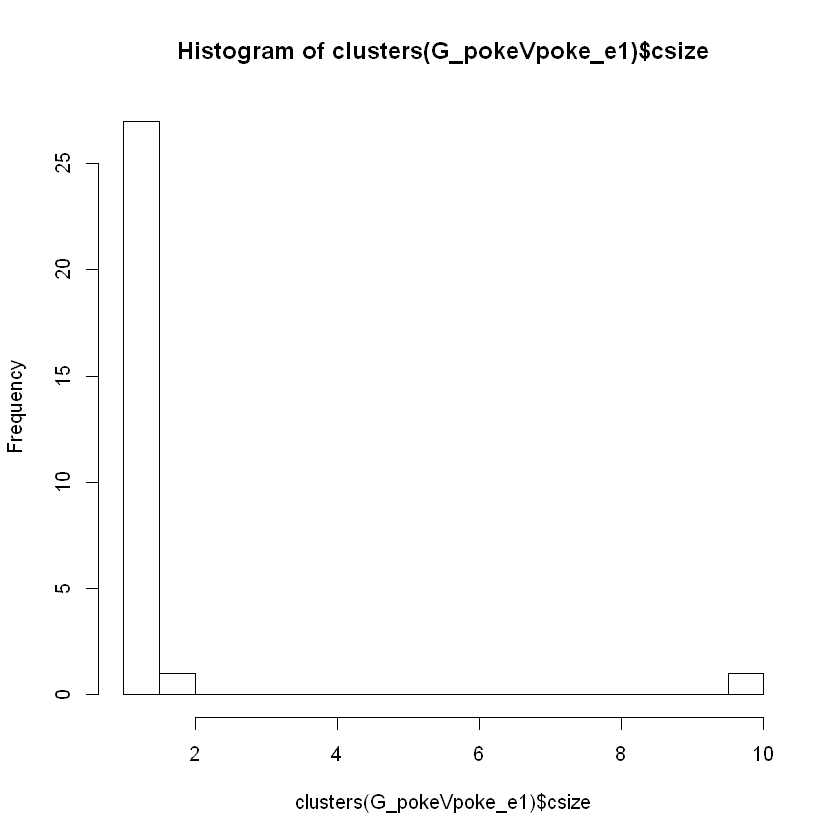

In [29]:
average.path.length(G_pokeVpoke_e1, directed=TRUE, unconnected=TRUE)
path.length.hist (G_pokeVpoke_e1, directed = TRUE)

eccentricity(G_pokeVpoke_e1, vids = V(G_pokeVpoke_e1), mode = c("all"))
eccentricity(G_pokeVpoke_e1, vids = V(G_pokeVpoke_e1), mode = c("in"))
eccentricity(G_pokeVpoke_e1, vids = V(G_pokeVpoke_e1), mode = c("out"))

diameter(G_pokeVpoke_e1)

clusters(G_pokeVpoke_e1)

hist(clusters(G_pokeVpoke_e1)$csize,15)

[1] 1

$res
[1] 1

$unconnected
[1] 1481

Nidorino           Gengar       Charmander         Squirtle 
               0                0                0                0 
          Pidgey          Nidoran             Onix          Jolteon 
               0                0                0                1 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               0                0                0                0 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               0                0                0                0 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               0                0                0                0 
        Caterpie          Rattata          Spearow          Geodude 
               0                0                0                0 
         Metapod          Pidgeot          Dewgong          Koffing 
               0                0                0                1 
         Moltres           Rhydon        Tentacool        Dragonite 
               0                0                0                0 
         Snorlax         Kabutops       Victreebel         Alakazam 
               0                0                0                0 
       Exeggutor         Articuno           Zapdos 
               0                0                0

Nidorino           Gengar       Charmander         Squirtle 
               0                0                0                0 
          Pidgey          Nidoran             Onix          Jolteon 
               0                0                0                0 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               0                0                0                0 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               0                0                0                0 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               0                0                0                0 
        Caterpie          Rattata          Spearow          Geodude 
               0                0                0                0 
         Metapod          Pidgeot          Dewgong          Koffing 
               0                0                0                1 
         Moltres           Rhydon        Tentacool        Dragonite 
               0                0                0                0 
         Snorlax         Kabutops       Victreebel         Alakazam 
               0                0                0                0 
       Exeggutor         Articuno           Zapdos 
               0                0                0

Nidorino           Gengar       Charmander         Squirtle 
               0                0                0                0 
          Pidgey          Nidoran             Onix          Jolteon 
               0                0                0                1 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               0                0                0                0 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               0                0                0                0 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               0                0                0                0 
        Caterpie          Rattata          Spearow          Geodude 
               0                0                0                0 
         Metapod          Pidgeot          Dewgong          Koffing 
               0                0                0                0 
         Moltres           Rhydon        Tentacool        Dragonite 
               0                0                0                0 
         Snorlax         Kabutops       Victreebel         Alakazam 
               0                0                0                0 
       Exeggutor         Articuno           Zapdos 
               0                0                0

[1] 1

$membership
        Nidorino           Gengar       Charmander         Squirtle 
               1                2                3                4 
          Pidgey          Nidoran             Onix          Jolteon 
               5                6                7                8 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               9               10               11               12 
       Hitmonlee          Scyther           Dodrio        Blastoise 
              13               14               15               16 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
              17               18               19               20 
        Caterpie          Rattata          Spearow          Geodude 
              21               22               23               24 
         Metapod          Pidgeot          Dewgong          Koffing 
              25               26               27                8 
         Moltres           Rhydon        Tentacool        Dragonite 
              28               29               30               31 
         Snorlax         Kabutops       Victreebel         Alakazam 
              32               33               34               35 
       Exeggutor         Articuno           Zapdos 
              36               37               38 

$csize
 [1] 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

$no
[1] 38

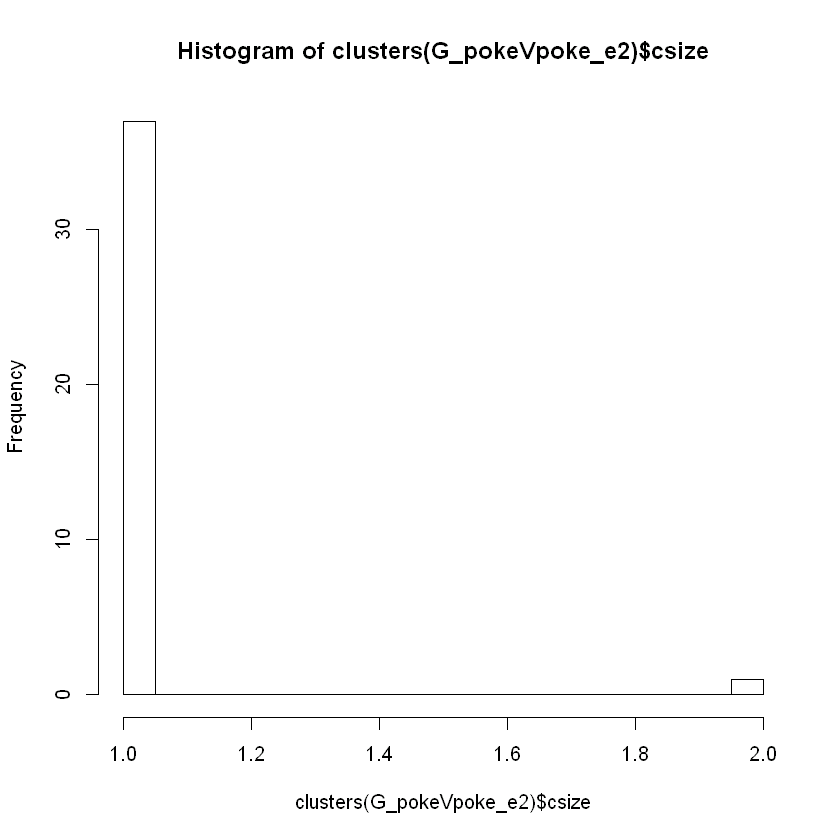

In [30]:
average.path.length(G_pokeVpoke_e2, directed=TRUE, unconnected=TRUE)
path.length.hist (G_pokeVpoke_e2, directed = TRUE)

eccentricity(G_pokeVpoke_e2, vids = V(G_pokeVpoke_e2), mode = c("all"))
eccentricity(G_pokeVpoke_e2, vids = V(G_pokeVpoke_e2), mode = c("in"))
eccentricity(G_pokeVpoke_e2, vids = V(G_pokeVpoke_e2), mode = c("out"))

diameter(G_pokeVpoke_e2)

clusters(G_pokeVpoke_e2)

hist(clusters(G_pokeVpoke_e2)$csize,15)

[1] 1.384615

$res
[1] 8 5

$unconnected
[1] 1469

Nidorino           Gengar       Charmander         Squirtle 
               0                0                0                0 
          Pidgey          Nidoran             Onix          Jolteon 
               0                0                0                2 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               1                0                2                1 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               2                0                0                0 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               0                0                0                0 
        Caterpie          Rattata          Spearow          Geodude 
               0                0                0                0 
         Metapod          Pidgeot          Dewgong          Koffing 
               0                0                0                0 
         Moltres           Rhydon        Tentacool        Dragonite 
               0                2                0                0 
         Snorlax         Kabutops       Victreebel         Alakazam 
               2                2                2                0 
       Exeggutor         Articuno           Zapdos 
               0                0                0

Nidorino           Gengar       Charmander         Squirtle 
               0                0                0                0 
          Pidgey          Nidoran             Onix          Jolteon 
               0                0                0                2 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               1                0                0                1 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               1                0                0                0 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               0                0                0                0 
        Caterpie          Rattata          Spearow          Geodude 
               0                0                0                0 
         Metapod          Pidgeot          Dewgong          Koffing 
               0                0                0                0 
         Moltres           Rhydon        Tentacool        Dragonite 
               0                2                0                0 
         Snorlax         Kabutops       Victreebel         Alakazam 
               2                2                2                0 
       Exeggutor         Articuno           Zapdos 
               0                0                0

Nidorino           Gengar       Charmander         Squirtle 
               0                0                0                0 
          Pidgey          Nidoran             Onix          Jolteon 
               0                0                0                0 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               1                0                2                1 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               2                0                0                0 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               0                0                0                0 
        Caterpie          Rattata          Spearow          Geodude 
               0                0                0                0 
         Metapod          Pidgeot          Dewgong          Koffing 
               0                0                0                0 
         Moltres           Rhydon        Tentacool        Dragonite 
               0                0                0                0 
         Snorlax         Kabutops       Victreebel         Alakazam 
               0                0                0                0 
       Exeggutor         Articuno           Zapdos 
               0                0                0

[1] 2

$membership
        Nidorino           Gengar       Charmander         Squirtle 
               1                2                3                4 
          Pidgey          Nidoran             Onix          Jolteon 
               5                6                7                8 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               9               10                9                8 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               8               11               12               13 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
              14               15               16               17 
        Caterpie          Rattata          Spearow          Geodude 
              18               19               20               21 
         Metapod          Pidgeot          Dewgong          Koffing 
              22               23               24               25 
         Moltres           Rhydon        Tentacool        Dragonite 
              26                9               27               28 
         Snorlax         Kabutops       Victreebel         Alakazam 
               8                8                8               29 
       Exeggutor         Articuno           Zapdos 
              30               31               32 

$csize
 [1] 1 1 1 1 1 1 1 6 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

$no
[1] 32

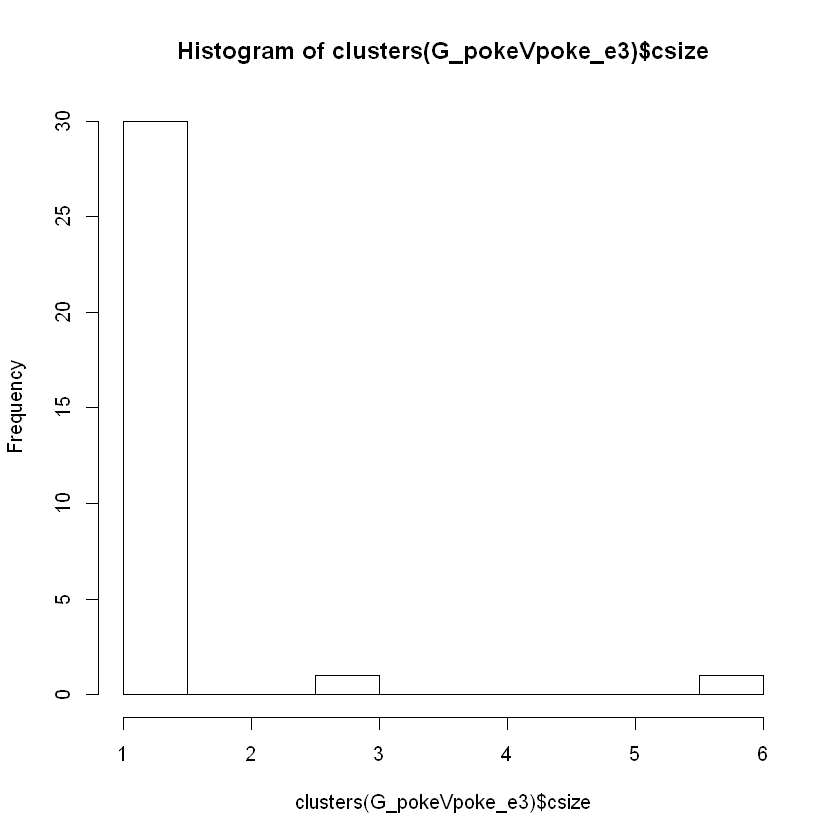

In [31]:
average.path.length(G_pokeVpoke_e3, directed=TRUE, unconnected=TRUE)
path.length.hist (G_pokeVpoke_e3, directed = TRUE)

eccentricity(G_pokeVpoke_e3, vids = V(G_pokeVpoke_e3), mode = c("all"))
eccentricity(G_pokeVpoke_e3, vids = V(G_pokeVpoke_e3), mode = c("in"))
eccentricity(G_pokeVpoke_e3, vids = V(G_pokeVpoke_e3), mode = c("out"))

diameter(G_pokeVpoke_e3)

clusters(G_pokeVpoke_e3)

hist(clusters(G_pokeVpoke_e3)$csize,15)

[1] 1.375

$res
[1] 17  5  2

$unconnected
[1] 1458

Nidorino           Gengar       Charmander         Squirtle 
               0                3                1                1 
          Pidgey          Nidoran             Onix          Jolteon 
               0                0                2                3 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               3                1                0                0 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               0                1                1                2 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               2                3                3                1 
        Caterpie          Rattata          Spearow          Geodude 
               0                0                0                0 
         Metapod          Pidgeot          Dewgong          Koffing 
               0                4                4                0 
         Moltres           Rhydon        Tentacool        Dragonite 
               4                2                2                2 
         Snorlax         Kabutops       Victreebel         Alakazam 
               0                0                0                2 
       Exeggutor         Articuno           Zapdos 
               1                2                1

Nidorino           Gengar       Charmander         Squirtle 
               0                2                1                0 
          Pidgey          Nidoran             Onix          Jolteon 
               0                0                1                2 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               0                0                0                0 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               0                0                0                1 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               1                0                0                0 
        Caterpie          Rattata          Spearow          Geodude 
               0                0                0                0 
         Metapod          Pidgeot          Dewgong          Koffing 
               0                3                3                0 
         Moltres           Rhydon        Tentacool        Dragonite 
               1                1                1                1 
         Snorlax         Kabutops       Victreebel         Alakazam 
               0                0                0                1 
       Exeggutor         Articuno           Zapdos 
               1                2                1

Nidorino           Gengar       Charmander         Squirtle 
               0                0                0                1 
          Pidgey          Nidoran             Onix          Jolteon 
               0                0                0                1 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               3                1                0                0 
       Hitmonlee          Scyther           Dodrio        Blastoise 
               0                1                1                2 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               1                2                1                1 
        Caterpie          Rattata          Spearow          Geodude 
               0                0                0                0 
         Metapod          Pidgeot          Dewgong          Koffing 
               0                0                0                0 
         Moltres           Rhydon        Tentacool        Dragonite 
               0                0                0                0 
         Snorlax         Kabutops       Victreebel         Alakazam 
               0                0                0                0 
       Exeggutor         Articuno           Zapdos 
               0                0                0

[1] 3

$membership
        Nidorino           Gengar       Charmander         Squirtle 
               1                2                3                3 
          Pidgey          Nidoran             Onix          Jolteon 
               4                5                6                7 
       Charizard           Lapras        Nidoqueen          Rhyhorn 
               7                8                9               10 
       Hitmonlee          Scyther           Dodrio        Blastoise 
              11                6               12                7 
          Mewtwo Mega Charizard X         Rapidash           Tauros 
               2                2                2               13 
        Caterpie          Rattata          Spearow          Geodude 
              14               15               16               17 
         Metapod          Pidgeot          Dewgong          Koffing 
              18                7                7               19 
         Moltres           Rhydon        Tentacool        Dragonite 
               7                8                8                8 
         Snorlax         Kabutops       Victreebel         Alakazam 
              20               21               22                6 
       Exeggutor         Articuno           Zapdos 
              12                2               13 

$csize
 [1] 1 5 2 1 1 3 6 4 1 1 1 2 2 1 1 1 1 1 1 1 1 1

$no
[1] 22

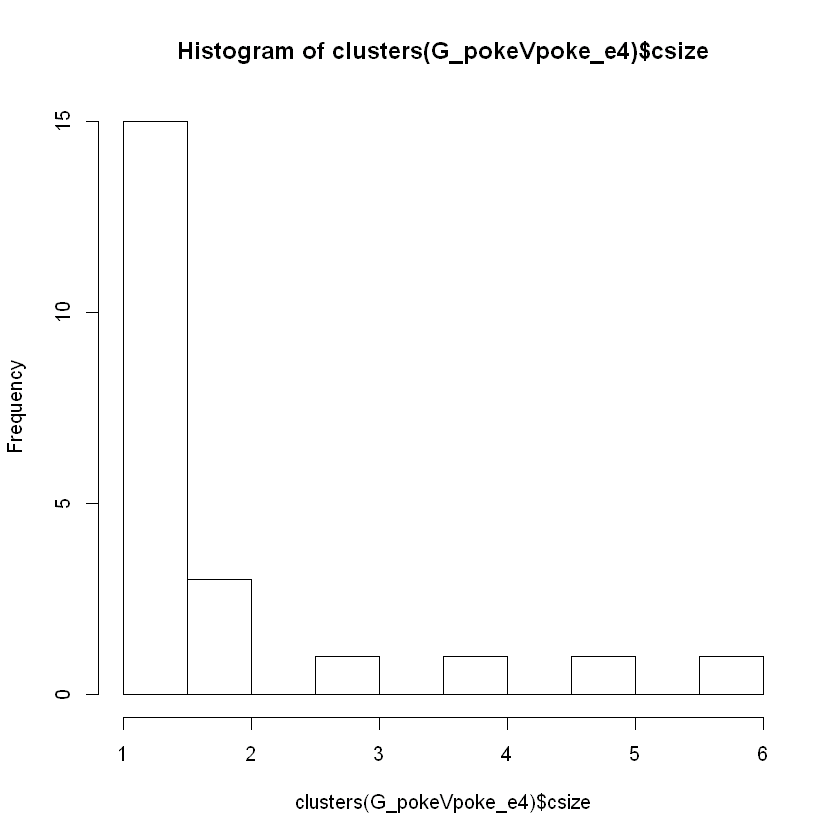

In [32]:
average.path.length(G_pokeVpoke_e4, directed=TRUE, unconnected=TRUE)
path.length.hist (G_pokeVpoke_e4, directed = TRUE)

eccentricity(G_pokeVpoke_e4, vids = V(G_pokeVpoke_e4), mode = c("all"))
eccentricity(G_pokeVpoke_e4, vids = V(G_pokeVpoke_e4), mode = c("in"))
eccentricity(G_pokeVpoke_e4, vids = V(G_pokeVpoke_e4), mode = c("out"))

diameter(G_pokeVpoke_e4)

clusters(G_pokeVpoke_e4)

hist(clusters(G_pokeVpoke_e4)$csize,15)

In [33]:
gr <- G_pokeVpoke_all_ap
matsch <- match(V(gr)$Type1, types)
g_fire <- contract.vertices(G_pokeVpoke_all_ap, matsch)

V(g_fire)$name = types
plot.igraph(g_fire)

ERROR: Error in match(V(gr)$Type1, types): Objekt 'types' nicht gefunden


ERROR: Error in contract.vertices(G_pokeVpoke_all_ap, matsch): Objekt 'matsch' nicht gefunden


ERROR: Error in eval(expr, envir, enclos): Objekt 'types' nicht gefunden


ERROR: Error in plot.igraph(g_fire): Objekt 'g_fire' nicht gefunden


In [34]:
V(g_fire)



ERROR: Error in match(x, table, nomatch = 0L): Objekt 'g_fire' nicht gefunden


# Questions

1) Are fighting the same Pokemon together?

2) How many Pokemon are fighting at a time?

3) # Pokemon?

4) # Pokemoon <-> Pokemon?